# Importing Dataset


In [62]:
# وارد کردن کتابخانه‌های مورد نیاز

import pandas as pd
# pandas: برای کار با داده‌های جدولی

import matplotlib.pyplot as plt
# matplotlib: برای رسم نمودارها

import seaborn as sns
# seaborn: برای رسم regplot ,scatterplot ,implot,kdeplot  و نمودارهای آماری

# sklearn: برای استفاده از مدل‌ها و ابزارهای یادگیری ماشین
from sklearn import preprocessing
# preprocessing:  این خط کد بخش مربوط به پردازش و آماده‌سازی داده‌ها را از کتابخانه اسکیت-لرن وارد میکند


from sklearn import metrics
# metrics: این خط کد بخش مربوط به ارزیابی مدل‌های یادگیری ماشین را وارد می‌کند
from sklearn.preprocessing import StandardScaler
# StandardScaler: این خط کد بخش مربوط به استاندارد‌سازی ویژگی‌ها را وارد می‌کند
# استاندارد‌سازی داده‌ها معمولاً قبل از آموزش مدل‌های یادگیری ماشین انجام می‌شود تا تأثیر مقیاس متغیرها کاهش یابد.


import numpy as np
# NumPy:  برای کار با آرایه‌ها

from tabulate import tabulate
# Tabulate:  برای ایجاد جداول زیبا در خروجی


from sklearn.preprocessing import LabelEncoder  
#  این خط کد مربوط به کتابخانه `sklearn.preprocessing` است.
# `LabelEncoder` یک ابزار برای تبدیل متغیرهای کیفی (categorical) به متغیرهای عددی است.
# این تبدیل به ما کمک می‌کند تا از متغیرهای کیفی در مدل‌های یادگیری ماشین استفاده کنیم.

from sklearn.impute import KNNImputer
# این خط کد مربوط به کتابخانه `sklearn.impute` است.
# `KNNImputer` یک ابزار برای پر کردن مقادیر گمشده در داده‌ها است.
# این ابزار با استفاده از الگوریتم نزدیک‌ترین همسایه‌ها (K-Nearest Neighbors) مقادیر گمشده را تخمین می‌زند.

from sklearn.metrics import mean_squared_error
# این خطوط کد مربوط به کتابخانه `sklearn.metrics` هستند.
# این توابع برای ارزیابی مدل‌های رگرسیونی استفاده می‌شوند:
# `mean_squared_error`: محاسبه میانگین مربع خطا
# `mean_absolute_error`: محاسبه میانگین قدر مطلق خطا
# `r2_score`: محاسبه ضریب تعیین
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy import stats 
# این خط کد مربوط به کتابخانه `scipy` است.
# `stats` زیرکتابخانه‌ای در `scipy` است که حاوی ابزارهای آماری مختلف است.


In [392]:
# import pandas as pd
# ابتدا باید فایل CSV داده‌های مشتریان را وارد کنیم.
# pandas: برای کار با داده‌های جدولی
# خواندن فایل CSV
# نتیجه این عملیات در متغیر "df" ذخیره می‌شود.
df = pd.read_csv(r"D:\Uni\Term 6\Data Minding\clustering\Mall_Customers.csv")

print(df)
# نمایش چند سطر اول از دیتافریم


     CustomerID  Gender   Age Annual Income (k$)  Spending Score (1-100)
0             1    Male  19.0                 15                      39
1             2    Male  21.0                 ??                      81
2             3  Female  20.0                 16                       6
3             4  Female  23.0                 16                      77
4             5  Female  31.0                 17                      40
..          ...     ...   ...                ...                     ...
198         196  Female  35.0                120                     120
199         197  Female  45.0                126                      28
200         198    Male  32.0                126                      74
201         199    Male  32.0                137                      18
202         200    Male  30.0                137                      83

[203 rows x 5 columns]


# Preprocessing


 Exploratory Data Analysis (EDA)

In [35]:
#EDA به ما کمک می‌کند تا دیدگاه کلی نسبت به داده‌ها پیدا کنیم.
#مشخص کردن تایپ هر فیچر
df.dtypes

CustomerID                  int64
Gender                     object
Age                       float64
Annual Income (k$)         object
Spending Score (1-100)      int64
dtype: object

In [36]:
#10رکورد اول 
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15,39
1,2,Male,21.0,??,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,40
5,6,Female,22.0,17,76
6,7,Female,35.0,18,6
7,8,Female,23.0,??,94
8,9,Male,64.0,19,3
9,10,Female,30.0,19,72


In [37]:
#10 رکورد آخر
df.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
193,191,Female,34.0,103,23
194,192,Female,32.0,103,69
195,193,Male,33.0,113,8
196,194,Female,38.0,113,91
197,195,Female,47.0,120,16
198,196,Female,35.0,120,120
199,197,Female,45.0,126,28
200,198,Male,32.0,126,74
201,199,Male,32.0,137,18
202,200,Male,30.0,137,83


In [38]:
#تعداد سطر و ستون
print('Number of rows:' , len(df)) #rows
print('Number of columns:' , len(df.columns)) #columns

Number of rows: 203
Number of columns: 5


In [39]:
# محاسبه و چاپ آماره‌های توصیفی برای داده‌فریم df.descibe()
# این آمارها شامل تعداد مشاهدات، میانگین، انحراف معیار، کمینه، بیشینه، و چندک‌ها است
#این اطلاعات به ما کمک می‌کند تا درک بهتری از ساختار و توزیع داده‌های خود داشته باشیم
df.describe()

,CustomerID,Age,Spending Score (1-100)
count,203.000000,199.000000,203.000000
mean,100.615764,38.688442,58.507389
std,58.082650,13.875835,93.449323
min,1.000000,18.000000,1.000000
25%,50.500000,28.500000,33.000000
50%,101.000000,36.000000,50.000000
75%,150.500000,48.500000,72.500000
max,200.000000,70.000000,1000.000000


In [40]:
#  محاسبه و چاپ فراوانی مقادیر موجود در ستون 'Spending Score' داده‌فریم df
# این اطلاعات به ما کمک می‌کند تا درک بهتری از توزیع و نحوه پراکندگی داده‌های ما در ستون 'Spending Score' داشته باشیم
# با استفاده از این اطلاعات می‌توانیم تصمیمات بهتری در مورد چگونگی پردازش و مدل‌سازی این ویژگی بگیری
df['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    6
     ..
98    1
12    1
65    1
79    1
18    1
Name: count, Length: 87, dtype: int64

In [41]:
# این کد محاسبه می‌کند که هر ستون در داده‌های `df` چند مقدار منحصر به فرد (unique) دارد
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         65
Spending Score (1-100)     87
dtype: int64

In [42]:
#یک توضیح کلی از df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              203 non-null    int64  
 1   Gender                  203 non-null    object 
 2   Age                     199 non-null    float64
 3   Annual Income (k$)      202 non-null    object 
 4   Spending Score (1-100)  203 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 8.1+ KB


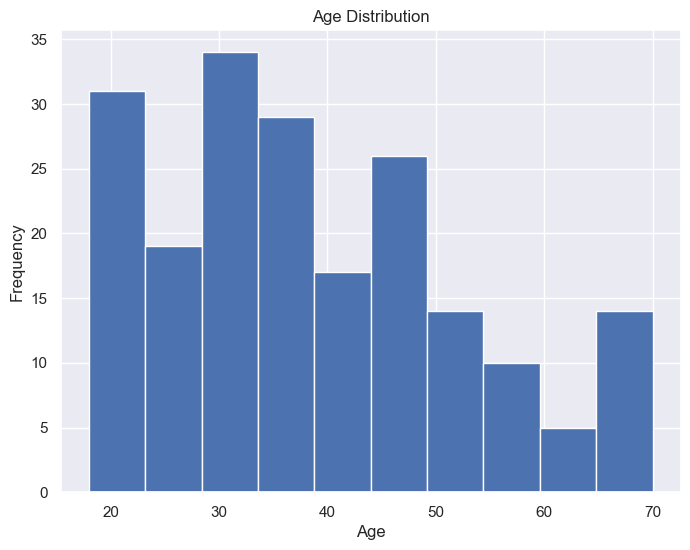

'\nگروه سنی 20 تا 30 سال:\n\nاین گروه تعداد زیادی از مشتریان را شامل می\u200cشود، حدود 30 نفر یا بیشتر.\nاین نشان می\u200cدهد که جمعیت قابل توجهی از مشتریان شما در این بازه سنی قرار دارند.\nگروه سنی 30 تا 40 سال:\n\nاین گروه نیز تعداد زیادی از مشتریان را شامل می\u200cشود، حدود 35 نفر یا بیشتر.\nاین نشان می\u200cدهد که بعد از گروه 20 تا 30 سال، این گروه بیشترین تعداد مشتریان را دارد.\nگروه سنی 40 تا 50 سال:\n\nتعداد مشتریان در این گروه کاهش یافته و به حدود 25 نفر می\u200cرسد.\nاین کاهش نشان می\u200cدهد که افراد در این بازه سنی کمتر به مرکز خرید شما مراجعه می\u200cکنند.\nگروه سنی 50 تا 60 سال:\n\nتعداد مشتریان در این گروه به حدود 15 نفر کاهش یافته است.\nاین کاهش بیشتر نشان می\u200cدهد که مشتریان مسن\u200cتر کمتر به مرکز خرید شما مراجعه می\u200cکنند.\nگروه سنی 60 تا 70 سال:\n\nتعداد مشتریان در این گروه به کمترین میزان خود رسیده و حدود 10 نفر یا کمتر است.\nاین کاهش نشان می\u200cدهد که افراد مسن\u200cتر کمتر به مرکز خرید شما مراجعه می\u200cکنند.\nنتیجه\u200cگیری:\nمشتریان جوان\u200cتر (20 ت

In [43]:
# رسم هیستوگرام برای ستون Area
# ایجاد یک شکل (figure) با ابعاد 8 در 6 اینچ
plt.figure(figsize=(8, 6))
# رسم هیستوگرام برای ستون "Age" داده‌فریم df
plt.hist(df["Age"])
# تنظیم برچسب محور افقی به "Age"
plt.xlabel("Age")
# تنظیم برچسب محور عمودی به "Frequency"
plt.ylabel("Frequency")
# تنظیم عنوان نمودار به "Distribution of Age"
plt.title("Age Distribution")
# نمایش نمودار
plt.show()


#نمودار هیستوگرام بالا توزیع سنی مشتریان را نشان می‌دهد. برای تحلیل این نمودار به موارد زیر توجه کنید:
"""
گروه سنی 20 تا 30 سال:

این گروه تعداد زیادی از مشتریان را شامل می‌شود، حدود 30 نفر یا بیشتر.
این نشان می‌دهد که جمعیت قابل توجهی از مشتریان شما در این بازه سنی قرار دارند.
گروه سنی 30 تا 40 سال:

این گروه نیز تعداد زیادی از مشتریان را شامل می‌شود، حدود 35 نفر یا بیشتر.
این نشان می‌دهد که بعد از گروه 20 تا 30 سال، این گروه بیشترین تعداد مشتریان را دارد.
گروه سنی 40 تا 50 سال:

تعداد مشتریان در این گروه کاهش یافته و به حدود 25 نفر می‌رسد.
این کاهش نشان می‌دهد که افراد در این بازه سنی کمتر به مرکز خرید شما مراجعه می‌کنند.
گروه سنی 50 تا 60 سال:

تعداد مشتریان در این گروه به حدود 15 نفر کاهش یافته است.
این کاهش بیشتر نشان می‌دهد که مشتریان مسن‌تر کمتر به مرکز خرید شما مراجعه می‌کنند.
گروه سنی 60 تا 70 سال:

تعداد مشتریان در این گروه به کمترین میزان خود رسیده و حدود 10 نفر یا کمتر است.
این کاهش نشان می‌دهد که افراد مسن‌تر کمتر به مرکز خرید شما مراجعه می‌کنند.
نتیجه‌گیری:
مشتریان جوان‌تر (20 تا 40 سال) بیشترین تعداد را در بین مشتریان شما تشکیل می‌دهند. این گروه سنی ممکن است تمایل بیشتری به خرید داشته باشند و یا فعالیت‌های بیشتری در مرکز خرید شما انجام دهند.
مشتریان میانسال و مسن‌تر (40 سال به بالا) تعداد کمتری از مشتریان شما را تشکیل می‌دهند. """

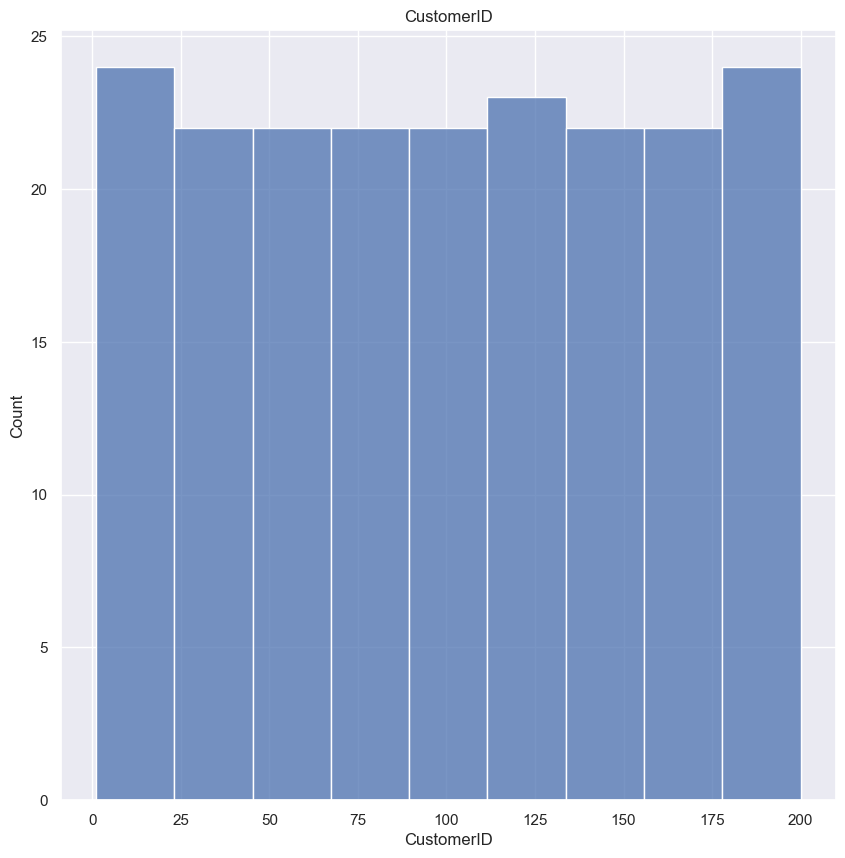

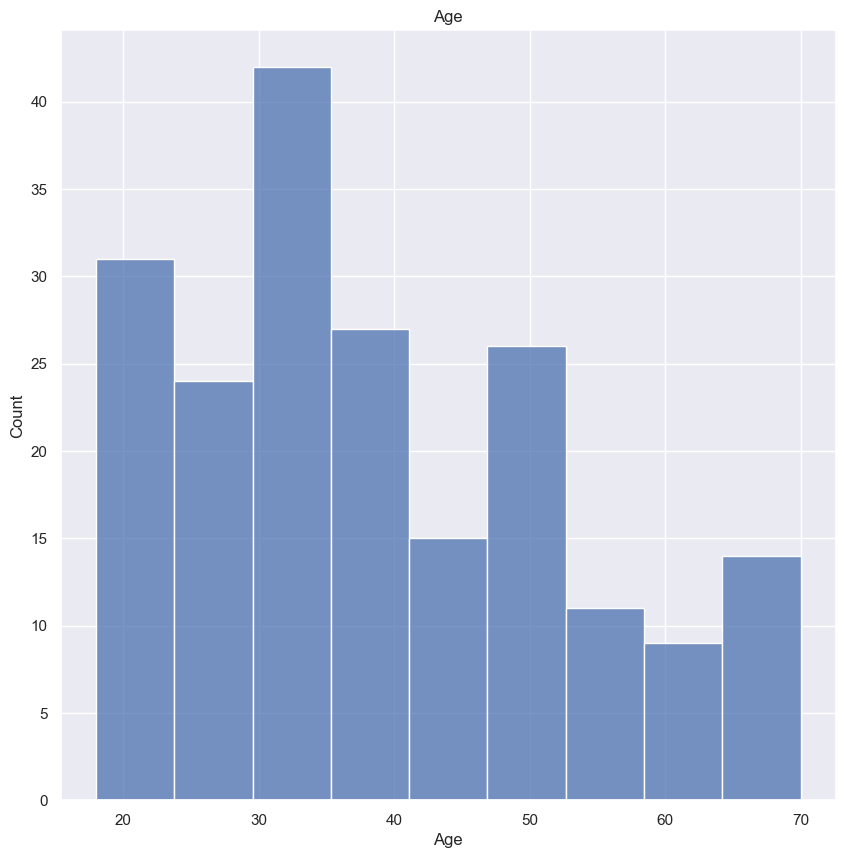

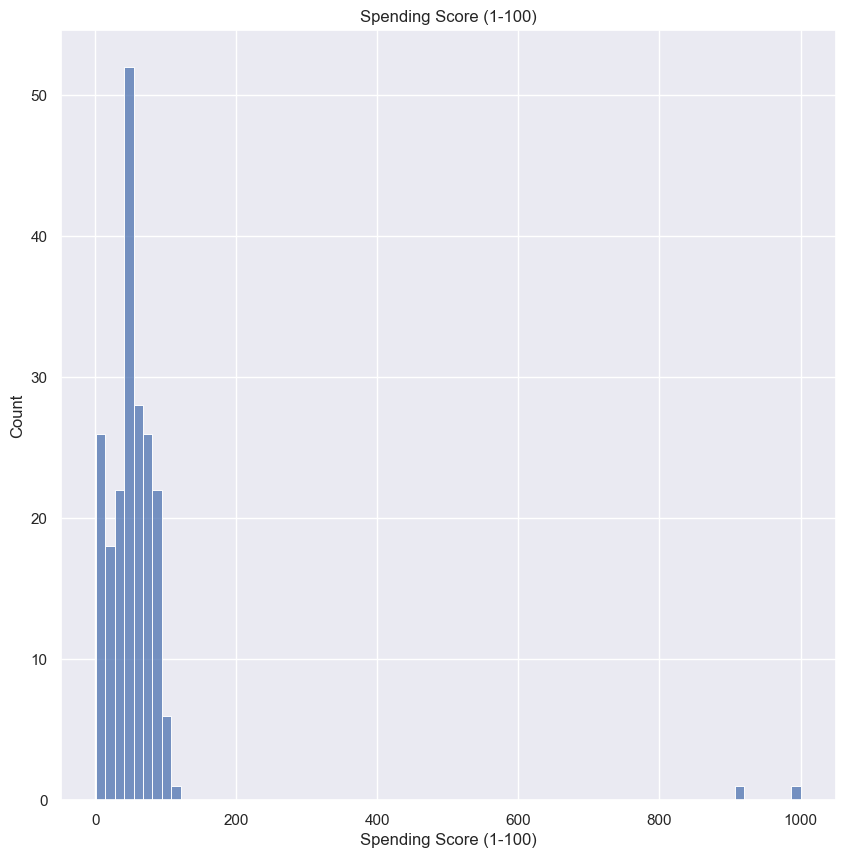

In [125]:
df_numeric = df.loc[:, df.select_dtypes(include='number').columns,]


for col in df_numeric:
    plt.figure(figsize=(10,10))
    sns.histplot(data=df, x=col)
    plt.title(col)
    plt.show()

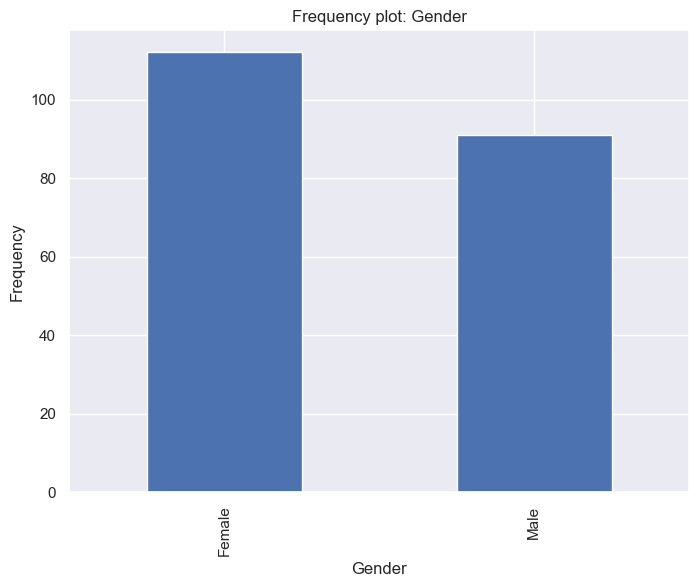

'\nتعداد مشتریان زن:\n\nستون مربوط به جنسیت "Female" نشان می\u200cدهد که تعداد مشتریان زن حدود 110 نفر است.\nاین میزان بیشتر از تعداد مشتریان مرد است و می\u200cتواند نشان\u200cدهنده این باشد که زنان تمایل بیشتری به خرید از این مرکز خرید دارند.\nتعداد مشتریان مرد:\n\nستون مربوط به جنسیت "Male" نشان می\u200cدهد که تعداد مشتریان مرد حدود 90 نفر است.\nاین میزان کمتر از تعداد مشتریان زن است.\nتحلیل نسبتی:\n\nنسبت زنان به مردان در این مرکز خرید تقریباً 1.22 به 1 است (110 به 90).\n'

In [44]:
# ایجاد یک شکل (figure) با ابعاد 8 در 6 اینچ
plt.figure(figsize=(8, 6))
# رسم نمودار میله‌ای برای نمایش فراوانی مقادیر در ستون "Gender" داده‌فریم `df`
df["Gender"].value_counts().plot(kind="bar")
# تنظیم برچسب محور افقی به "Gender"
plt.xlabel("Gender")
# تنظیم برچسب محور عمودی به "Frequency" 
plt.ylabel("Frequency")
# تنظیم عنوان نمودار به "Frequency plot: Gender"
plt.title("Frequency plot: Gender")
# نمایش نمودار
plt.show()

#تحلیل نمودار توزیع جنسیت مشتریان
# در این نمودار، محور افقی (X) نشان‌دهنده جنسیت
#و محور عمودی (Y) نشان‌دهنده تعداد مشتریان است

"""
تعداد مشتریان زن:

ستون مربوط به جنسیت "Female" نشان می‌دهد که تعداد مشتریان زن حدود 110 نفر است.
این میزان بیشتر از تعداد مشتریان مرد است و می‌تواند نشان‌دهنده این باشد که زنان تمایل بیشتری به خرید از این مرکز خرید دارند.
تعداد مشتریان مرد:

ستون مربوط به جنسیت "Male" نشان می‌دهد که تعداد مشتریان مرد حدود 90 نفر است.
این میزان کمتر از تعداد مشتریان زن است.
تحلیل نسبتی:

نسبت زنان به مردان در این مرکز خرید تقریباً 1.22 به 1 است (110 به 90).
"""



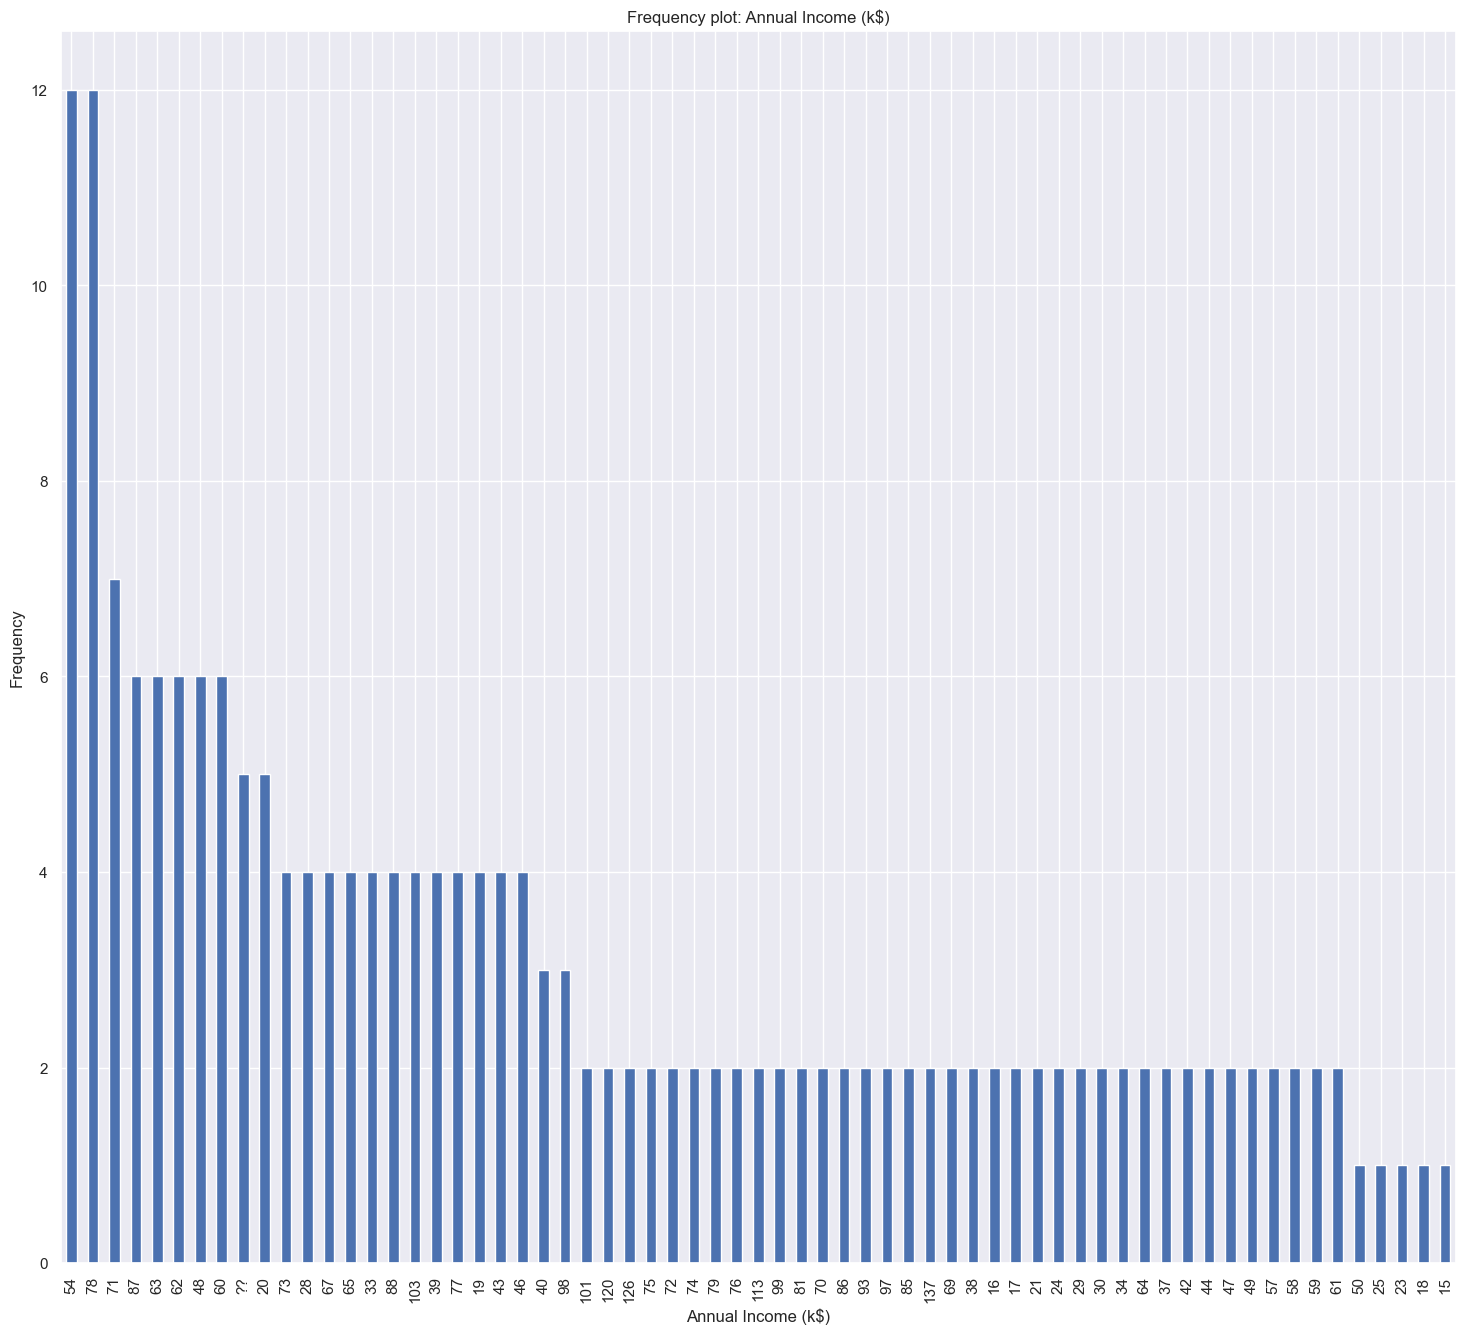

'\nنمودار بالا نشان\u200cدهنده\u200cی توزیع درآمد سالانه (به هزار دلار) در بین یک گروه از افراد است. با تحلیل این نمودار، موارد زیر قابل مشاهده است:\n\nتوزیع نابرابر درآمد: اکثر افراد درآمد سالانه پایینی دارند. بیشترین فراوانی در گروه\u200cهای درآمدی بین 15 هزار تا 30 هزار دلار مشاهده می\u200cشود.\nکاهش تدریجی فراوانی: با افزایش درآمد، تعداد افراد به تدریج کاهش می\u200cیابد.\nاستثناءهای درآمد بالا: چندین مورد با درآمد بسیار بالا نیز وجود دارد، اما این گروه\u200cها بسیار کم\u200cتعداد هستند.\n'

In [45]:
# ایجاد یک شکل (figure) با ابعاد 8 در 6 اینچ
plt.figure(figsize=(18, 16))
# رسم نمودار میله‌ای برای نمایش فراوانی مقادیر در ستون "Annual Income (k$)" داده‌فریم `df`
df["Annual Income (k$)"].value_counts().plot(kind="bar")
# تنظیم برچسب محور افقی به "Annual Income (k$)"
plt.xlabel("Annual Income (k$)")
# تنظیم برچسب محور عمودی به "Frequency"
plt.ylabel("Frequency")
# تنظیم عنوان نمودار به "Frequency plot: Annual Income (k$)"
plt.title("Frequency plot: Annual Income (k$)")
# نمایش نمودار
plt.show()

"""
نمودار بالا نشان‌دهنده‌ی توزیع درآمد سالانه (به هزار دلار) در بین یک گروه از افراد است. با تحلیل این نمودار، موارد زیر قابل مشاهده است:

توزیع نابرابر درآمد: اکثر افراد درآمد سالانه پایینی دارند. بیشترین فراوانی در گروه‌های درآمدی بین 15 هزار تا 30 هزار دلار مشاهده می‌شود.
کاهش تدریجی فراوانی: با افزایش درآمد، تعداد افراد به تدریج کاهش می‌یابد.
استثناءهای درآمد بالا: چندین مورد با درآمد بسیار بالا نیز وجود دارد، اما این گروه‌ها بسیار کم‌تعداد هستند.
"""

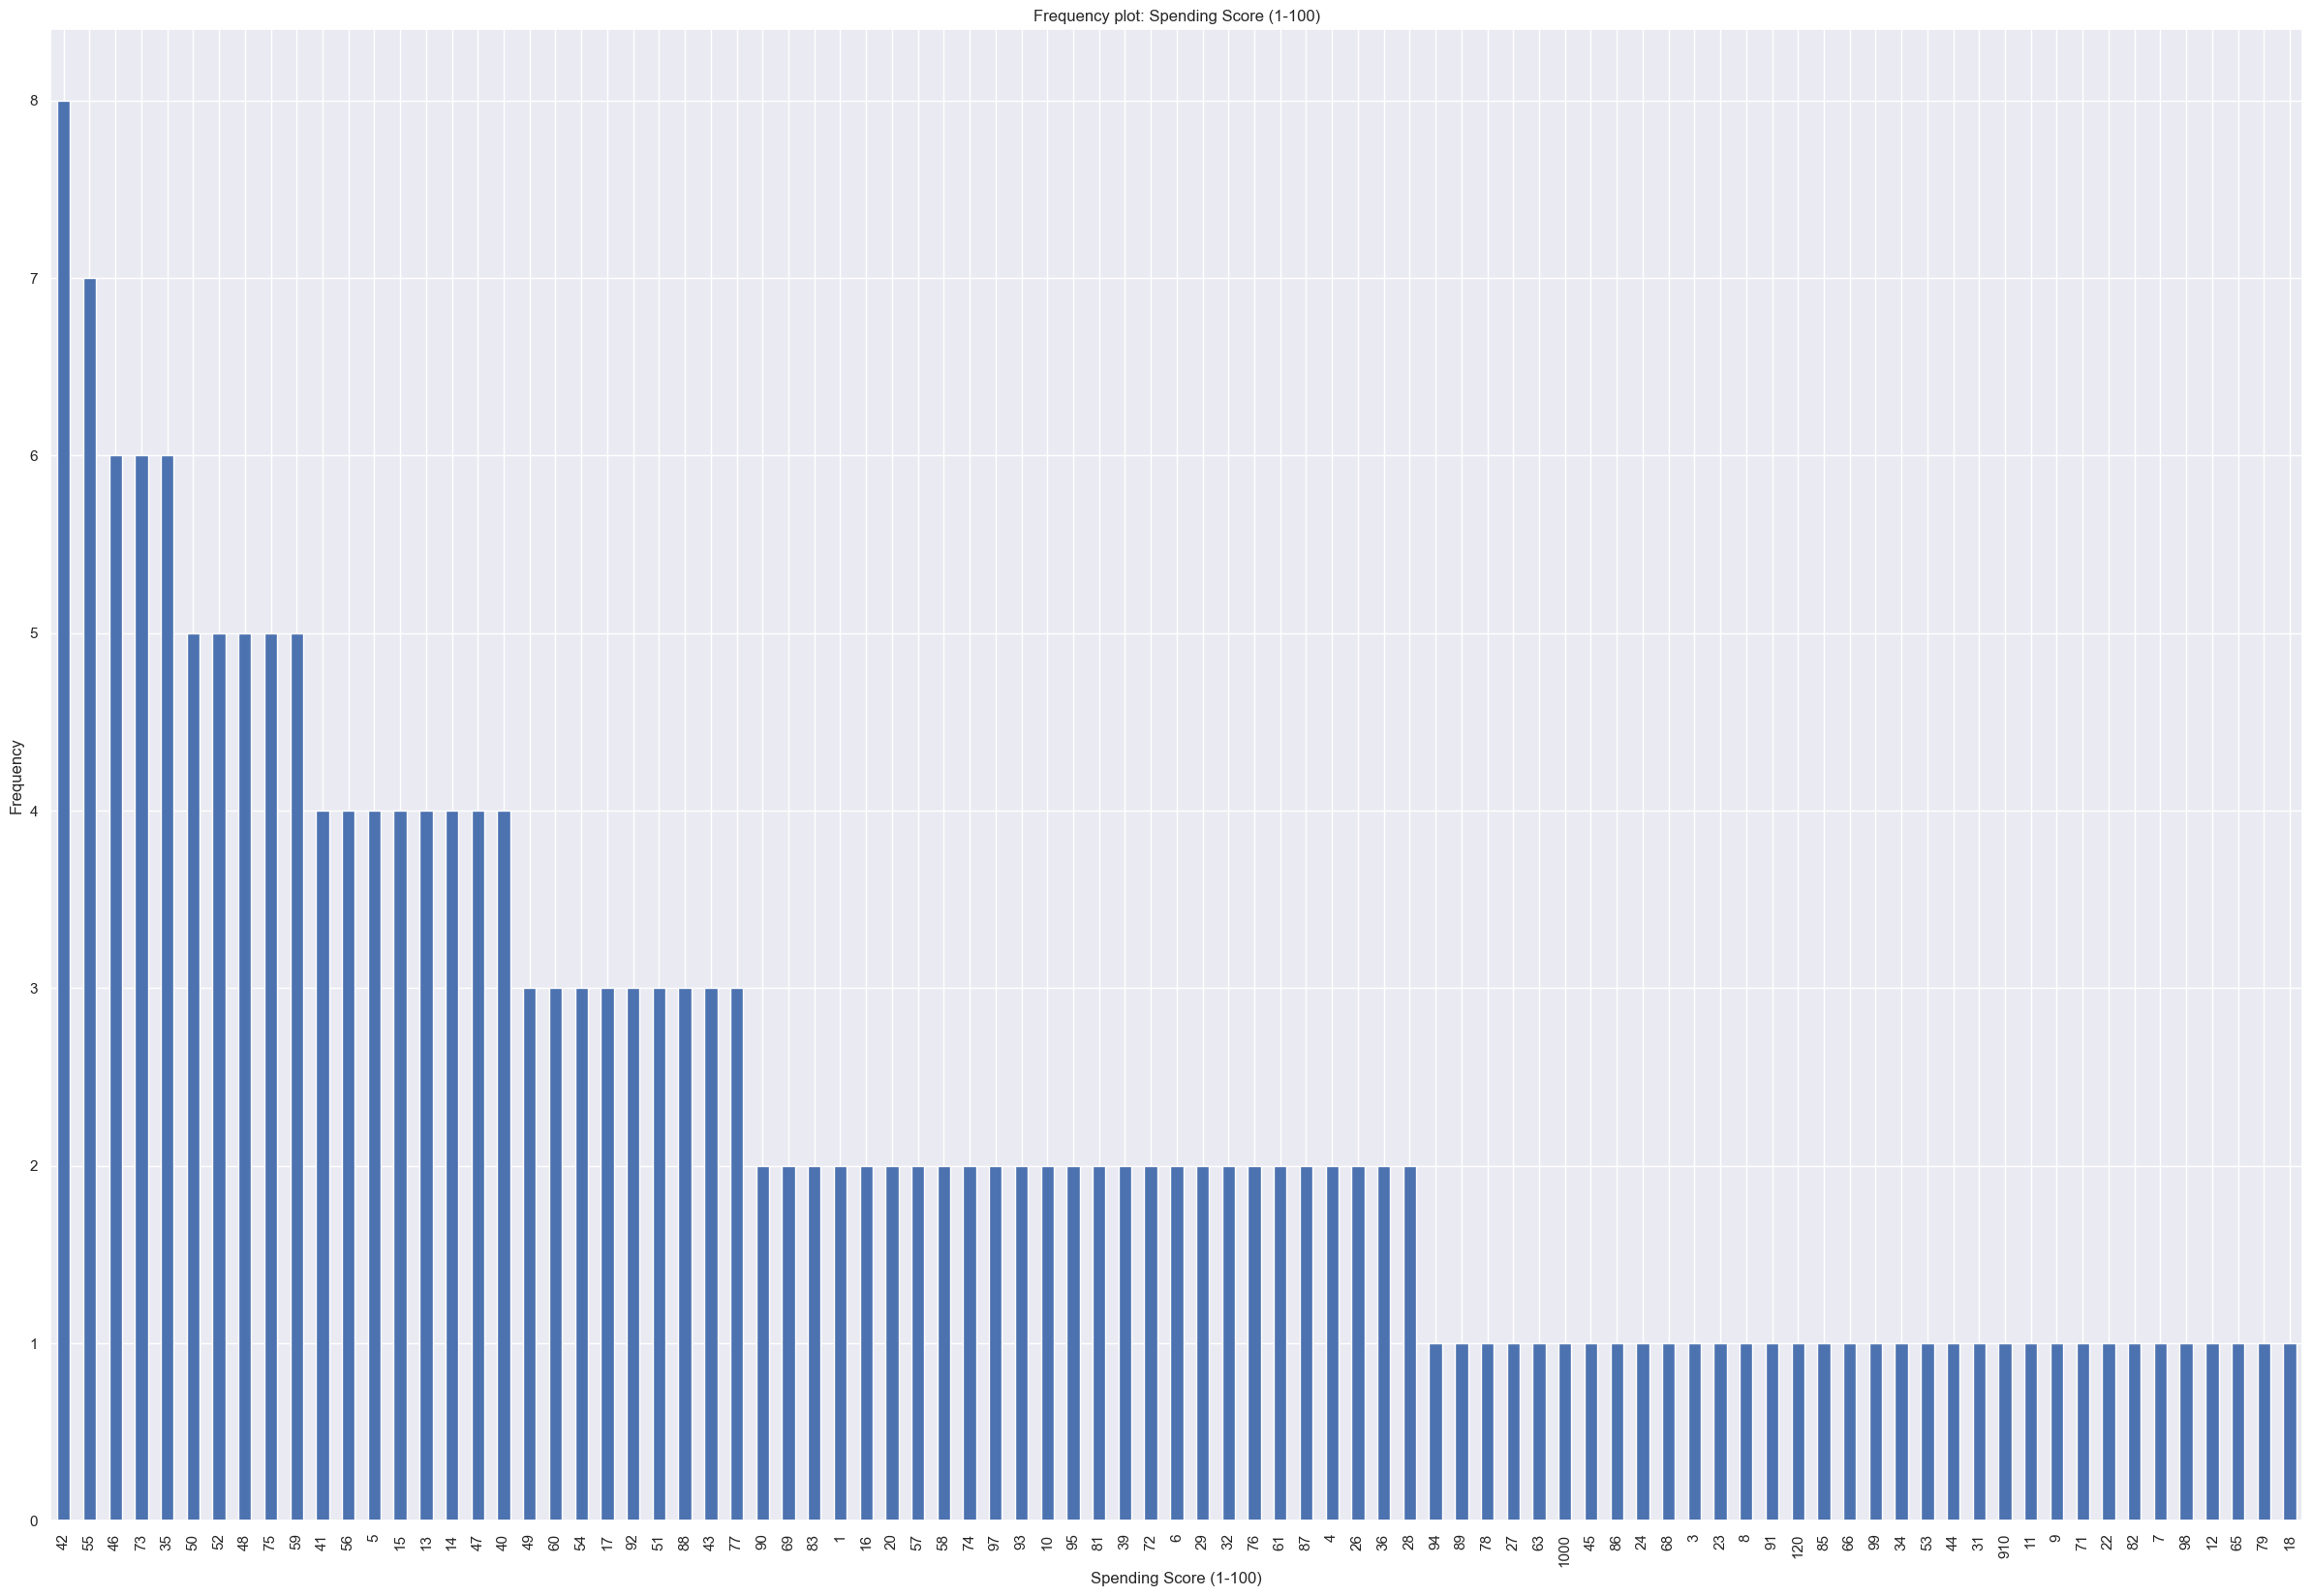

'\nتحلیل نمودار Spending Score (1-100)\nاین نمودار فراوانی تعداد افراد را براساس امتیاز مخارجشان از 1 تا 100 نشان می\u200cدهد.\n\nامتیازات پایین (1-20): افراد کمی با این امتیازات وجود دارند که ممکن است نشان\u200cدهنده خریداران کم\u200cمصرف یا کسانی باشد که کمتر هزینه می\u200cکنند.\nامتیازات متوسط (20-60): بیشترین تعداد افراد در این بازه قرار دارند. این افراد خریداران متوسطی هستند که به طور مداوم هزینه می\u200cکنند.\nامتیازات بالا (60-100): تعداد افراد با این امتیازات نیز کاهش یافته است. این افراد معمولاً خریداران پرمصرف و وفادار هستند.\nبیشترین فراوانی: امتیازهای پایین\u200cتر (1 تا 42) بیشترین فراوانی را دارند.\nکاهش فراوانی: با افزایش امتیاز، فراوانی کاهش می\u200cیابد.\nتحلیل: توزیع نابرابر امتیاز هزینه، با تراکم بیشتر در محدوده\u200cهای پایین\u200cتر.\n'

In [46]:
# ایجاد یک شکل (figure) با ابعاد 8 در 6 اینچ
plt.figure(figsize=(30, 20))
# رسم نمودار میله‌ای برای نمایش فراوانی مقادیر در ستون "Spending Score (1-100)" داده‌فریم `df`
df["Spending Score (1-100)"].value_counts().plot(kind="bar")
# تنظیم برچسب محور افقی به "Spending Score (1-100)"
plt.xlabel("Spending Score (1-100)")
# تنظیم برچسب محور عمودی به "Frequency"
plt.ylabel("Frequency")
# تنظیم عنوان نمودار به "Frequency plot: Spending Score (1-100)"
plt.title("Frequency plot: Spending Score (1-100)")
# نمایش نمودار
plt.show()

"""
تحلیل نمودار Spending Score (1-100)
این نمودار فراوانی تعداد افراد را براساس امتیاز مخارجشان از 1 تا 100 نشان می‌دهد.

امتیازات پایین (1-20): افراد کمی با این امتیازات وجود دارند که ممکن است نشان‌دهنده خریداران کم‌مصرف یا کسانی باشد که کمتر هزینه می‌کنند.
امتیازات متوسط (20-60): بیشترین تعداد افراد در این بازه قرار دارند. این افراد خریداران متوسطی هستند که به طور مداوم هزینه می‌کنند.
امتیازات بالا (60-100): تعداد افراد با این امتیازات نیز کاهش یافته است. این افراد معمولاً خریداران پرمصرف و وفادار هستند.
بیشترین فراوانی: امتیازهای پایین‌تر (1 تا 42) بیشترین فراوانی را دارند.
کاهش فراوانی: با افزایش امتیاز، فراوانی کاهش می‌یابد.
تحلیل: توزیع نابرابر امتیاز هزینه، با تراکم بیشتر در محدوده‌های پایین‌تر.
"""

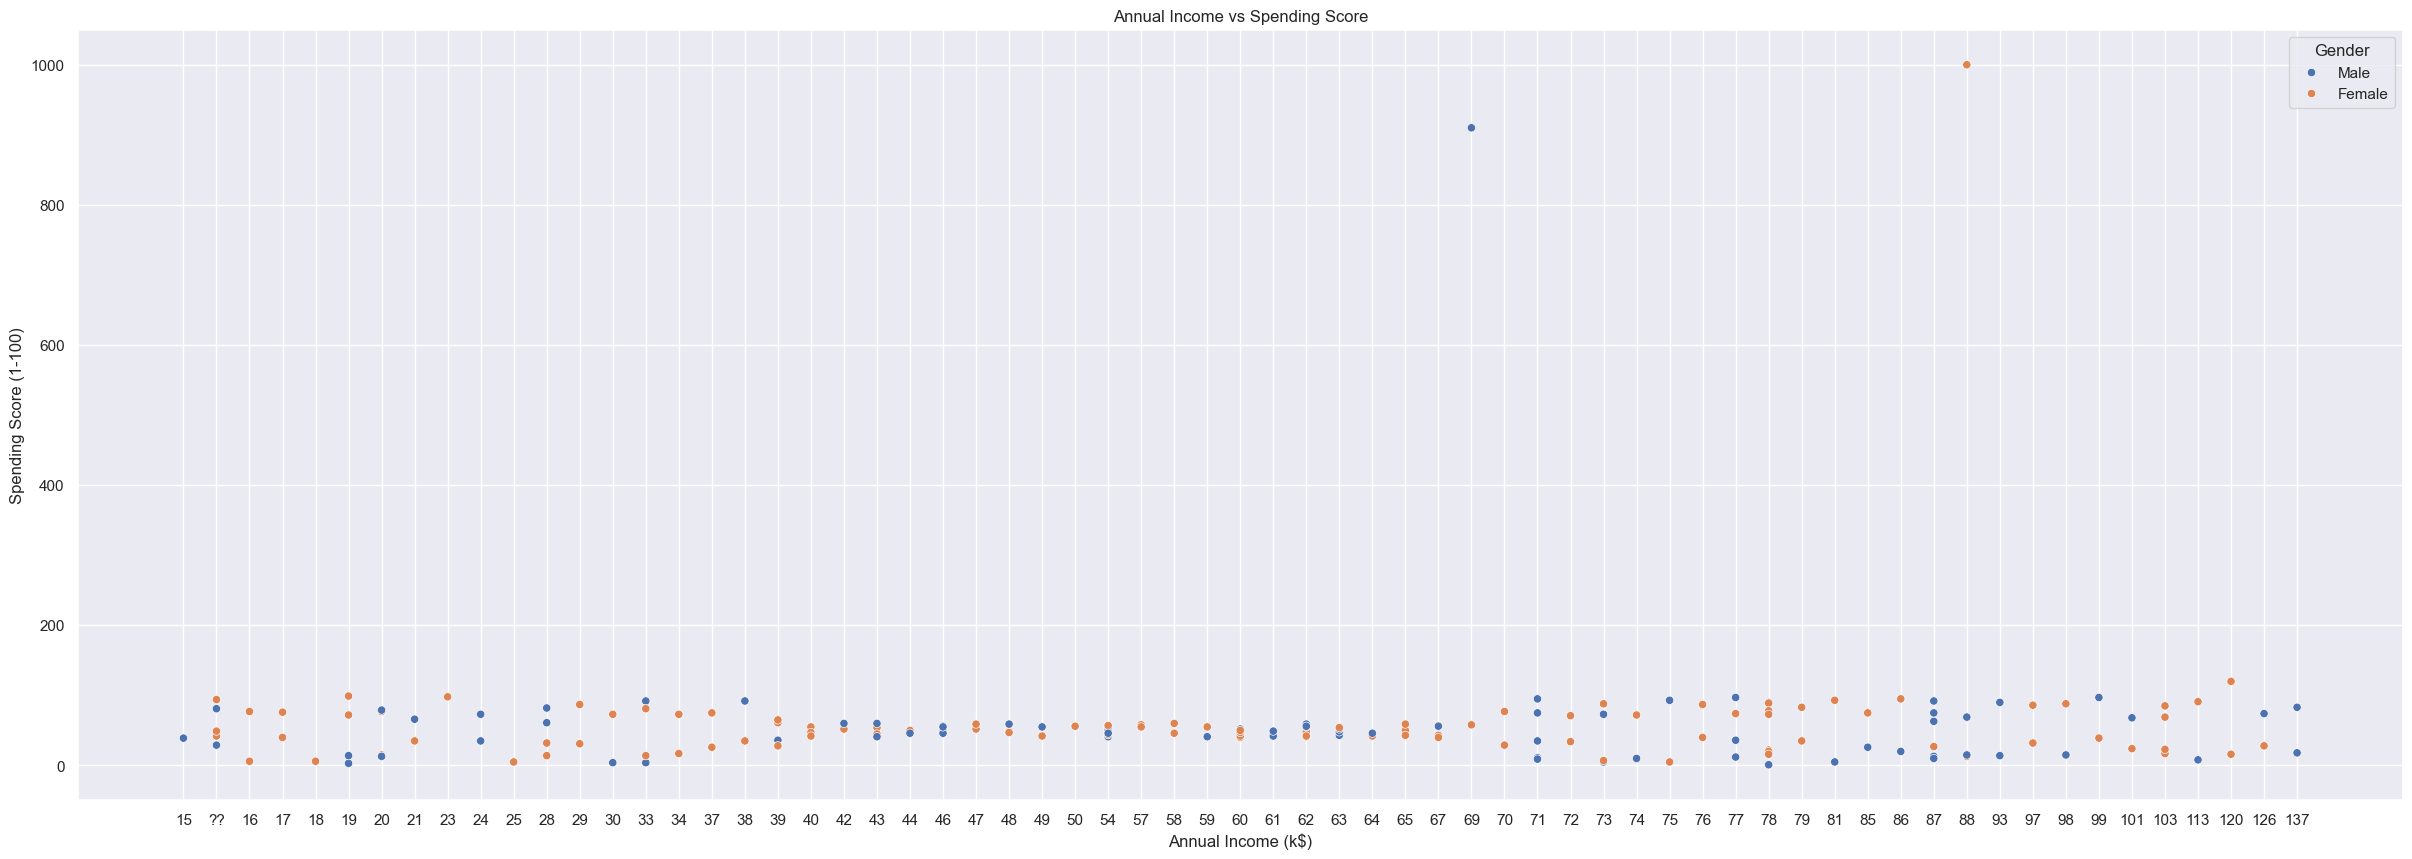

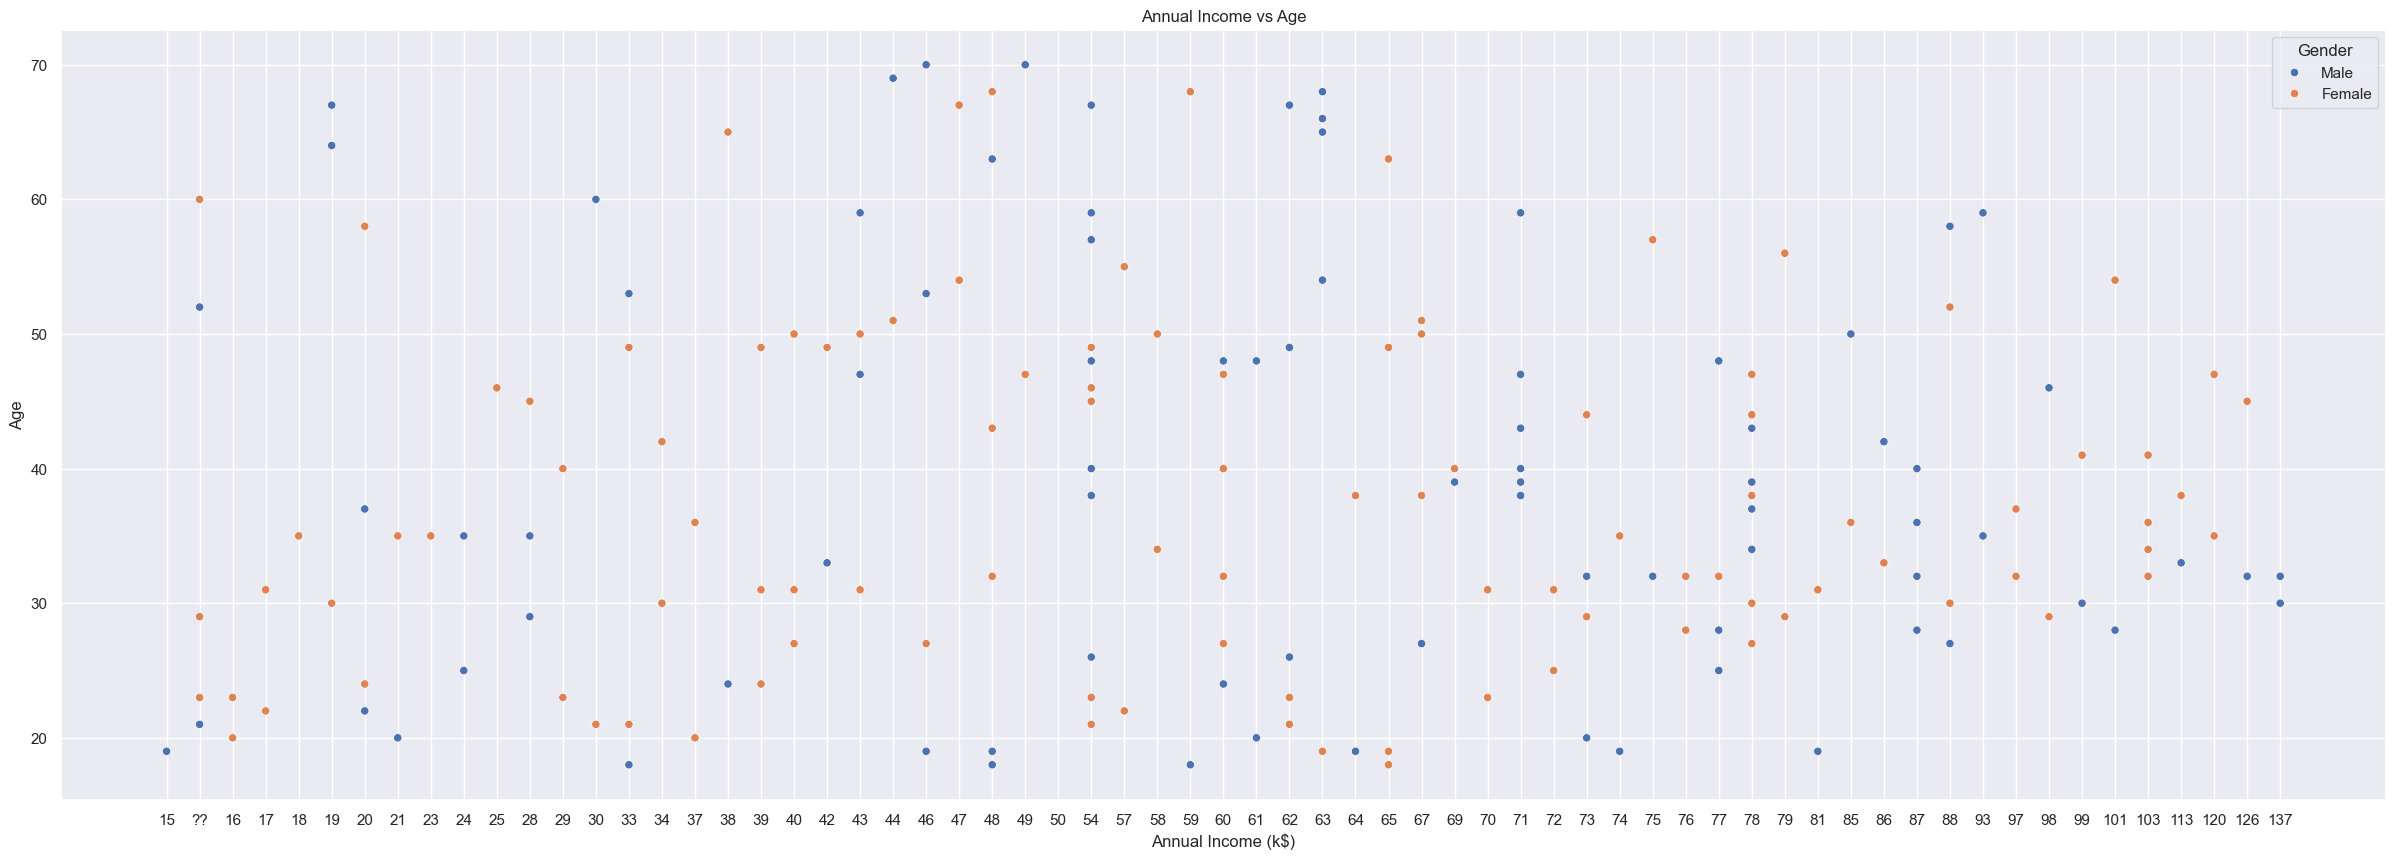

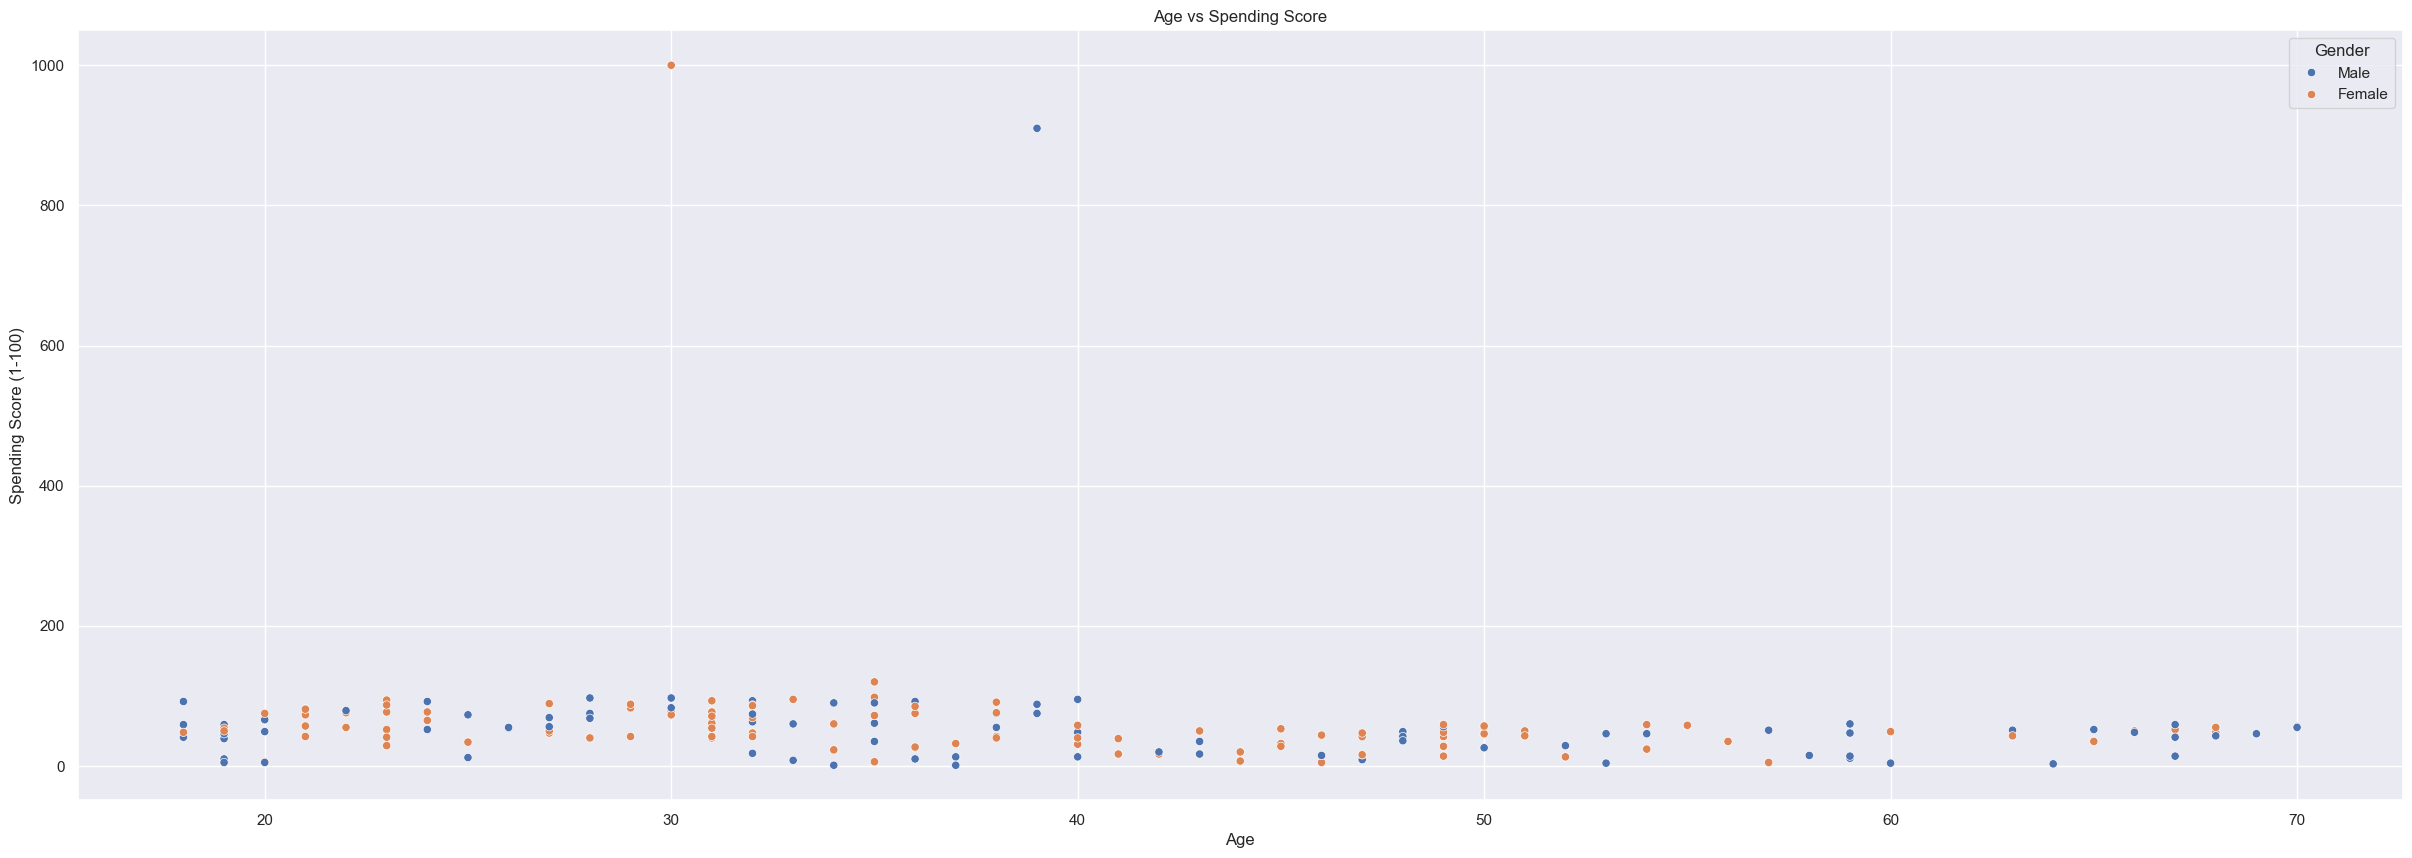

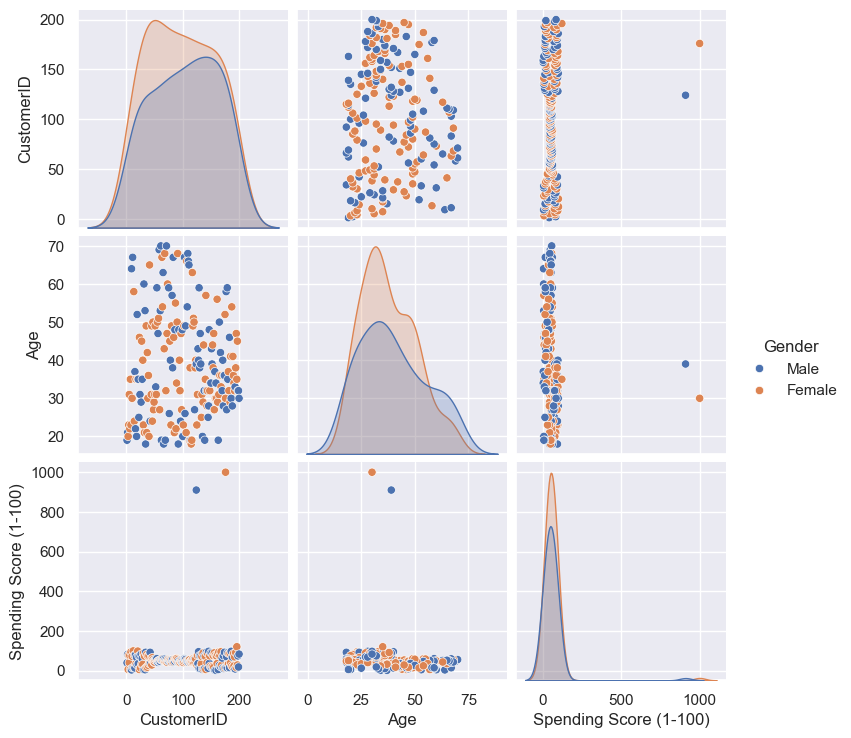

'\nنمودار ماتریس پراکندگی (Pair Plot) ارائه شده، شامل چندین نمودار پراکندگی و توزیع است که روابط بین متغیرهای مختلف را بر اساس جنسیت نشان می\u200cدهد. متغیرهای موجود شامل CustomerID، Age، و Spending Score هستند. در اینجا تحلیل کامل این نمودارها ارائه شده است:\n\nمشاهدات کلی:\nمحورها:\n\nمحورهای افقی و عمودی: متغیرهای CustomerID، Age، و Spending Score.\nرنگ\u200cها: جنسیت\u200cها را متمایز می\u200cکنند؛ آبی برای مردان و نارنجی برای زنان.\nنمودارهای چگالی (درایه\u200cهای قطری):\n\nاین نمودارها توزیع هر متغیر را بر اساس جنسیت نشان می\u200cدهند.\nتوزیع CustomerID تقریباً یکنواخت است.\nتوزیع سنی برای هر دو جنس تقریباً مشابه است، اما زنان کمی بیشتر در گروه سنی 30 تا 40 سال متمرکز شده\u200cاند.\nتوزیع امتیاز هزینه\u200cکرد به شدت به سمت پایین متمایل است و چندین نقطه خارج از محدوده وجود دارد.\nنمودارهای پراکندگی (درایه\u200cهای غیرقطری):\n\nCustomerID و Age: هیچ رابطه خاصی مشاهده نمی\u200cشود و داده\u200cها به صورت تصادفی توزیع شده\u200cاند.\nCustomerID و Spending Score: داده\u200cها به طور کل

In [228]:
# scatter plot برای درآمد سالانه و امتیاز هزینه
plt.figure(figsize=(30, 10))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


"""
نمودار پراکندگی ارائه شده، رابطه بین درآمد سالانه و امتیاز هزینه‌کرد را نشان می‌دهد. نقاط داده با رنگ‌های مختلف بر اساس جنسیت (آبی برای مردان و نارنجی برای زنان) مشخص شده‌اند.

مشاهدات:
محورها:

محور افقی (X): درآمد سالانه (به هزار دلار)
محور عمودی (Y): امتیاز هزینه‌کرد (در مقیاس 1 تا 100)
نقاط داده:

هر نقطه داده نشان‌دهنده درآمد سالانه و امتیاز هزینه‌کرد یک فرد است، و رنگ‌ها تفاوت جنسیت‌ها را نشان می‌دهند.
نقاط غیرعادی (Outliers):

دو نقطه غیرعادی وجود دارد: یکی برای یک مرد و دیگری برای یک زن که درآمد سالانه‌شان بیش از 100 هزار دلار است و امتیاز هزینه‌کرد بالایی دارند.
الگوهای کلی:

بیشتر نقاط داده بین درآمد سالانه 15 تا 137 هزار دلار و امتیاز هزینه‌کرد 1 تا 100 قرار دارند.
هیچ روند واضحی بین درآمد سالانه و امتیاز هزینه‌کرد مشاهده نمی‌شود.
به نظر می‌رسد که توزیع نقاط داده برای مردان و زنان نسبتاً مشابه است و تفاوت قابل توجهی بین دو گروه وجود ندارد.

"""

plt.figure(figsize=(30, 10))
sns.scatterplot(x='Annual Income (k$)', y='Age', hue='Gender', data=df)
plt.title('Annual Income vs Age')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(30, 10))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()



# pairplot برای بررسی روابط بین همه متغیرها
sns.pairplot(df, hue='Gender')
plt.show()

"""
نمودار ماتریس پراکندگی (Pair Plot) ارائه شده، شامل چندین نمودار پراکندگی و توزیع است که روابط بین متغیرهای مختلف را بر اساس جنسیت نشان می‌دهد. متغیرهای موجود شامل CustomerID، Age، و Spending Score هستند. در اینجا تحلیل کامل این نمودارها ارائه شده است:

مشاهدات کلی:
محورها:

محورهای افقی و عمودی: متغیرهای CustomerID، Age، و Spending Score.
رنگ‌ها: جنسیت‌ها را متمایز می‌کنند؛ آبی برای مردان و نارنجی برای زنان.
نمودارهای چگالی (درایه‌های قطری):

این نمودارها توزیع هر متغیر را بر اساس جنسیت نشان می‌دهند.
توزیع CustomerID تقریباً یکنواخت است.
توزیع سنی برای هر دو جنس تقریباً مشابه است، اما زنان کمی بیشتر در گروه سنی 30 تا 40 سال متمرکز شده‌اند.
توزیع امتیاز هزینه‌کرد به شدت به سمت پایین متمایل است و چندین نقطه خارج از محدوده وجود دارد.
نمودارهای پراکندگی (درایه‌های غیرقطری):

CustomerID و Age: هیچ رابطه خاصی مشاهده نمی‌شود و داده‌ها به صورت تصادفی توزیع شده‌اند.
CustomerID و Spending Score: داده‌ها به طور کلی در محدوده پایین امتیاز هزینه‌کرد متمرکز شده‌اند، اما چندین نقطه غیرعادی (Outliers) وجود دارد.
Age و Spending Score: هیچ رابطه واضحی مشاهده نمی‌شود و داده‌ها به صورت پراکنده توزیع شده‌اند.
نقاط قابل توجه:
نقاط غیرعادی (Outliers):

چندین نقطه غیرعادی وجود دارد، به خصوص در نمودارهای مرتبط با Spending Score که امتیازهای بسیار بالایی را نشان می‌دهند.
این نقاط ممکن است نیاز به بررسی بیشتر داشته باشند تا علت چنین امتیازهای غیرمعمولی مشخص شود.
تفاوت‌های جنسیتی:

توزیع سنی بین مردان و زنان کمی متفاوت است، با تمرکز بیشتر زنان در گروه سنی 30 تا 40 سال.
در امتیاز هزینه‌کرد تفاوت چندانی بین جنسیت‌ها مشاهده نمی‌شود، اما برخی نقاط غیرعادی در هر دو جنس وجود دارد.

"""


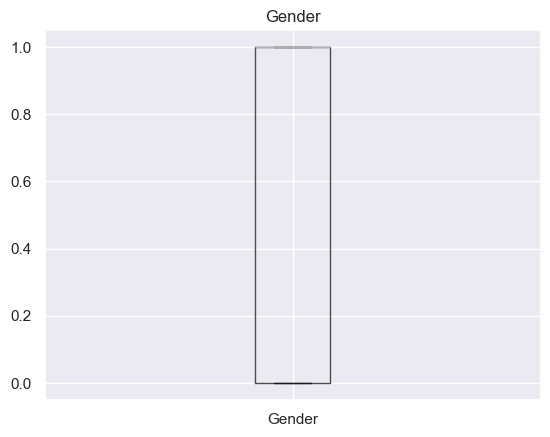

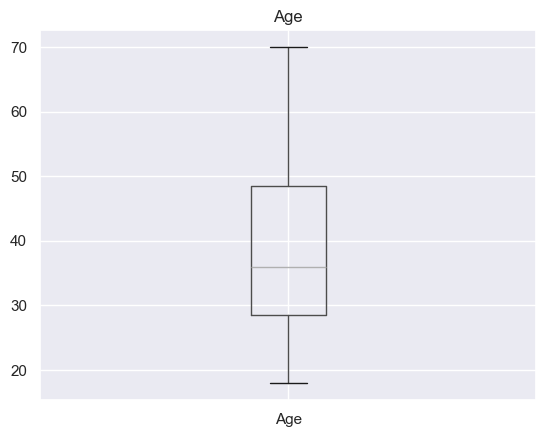

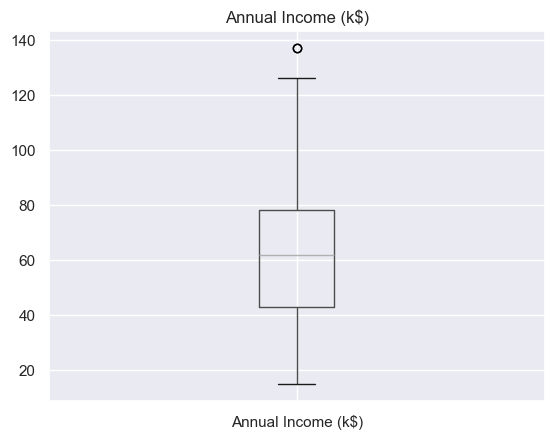

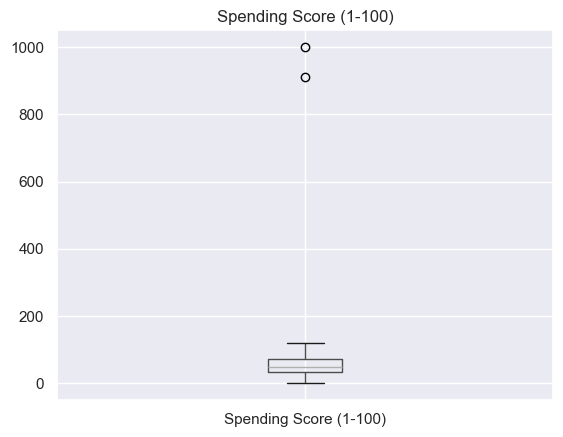

In [166]:
# EDA.9 -> Plotting box plot
# انتخاب ستون‌های عددی از دیتافریم
d_f = df.copy().drop('CustomerID', axis=1)
d_f['Gender'] = d_f['Gender'].map({'Male': 0, 'Female': 1})
d_f['Annual Income (k$)'] = d_f['Annual Income (k$)'].apply(pd.to_numeric,errors="coerce")
df_numeric = d_f.loc[:, d_f.select_dtypes(include='number').columns,]

# برای هر ستون عددی در دیتافریم
for column in df_numeric:
    # ایجاد یک شکل جدید برای هر ستون
    plt.figure()
    # تنظیم عنوان شکل به نام ستون
    plt.gca().set_title(column)
    # رسم boxplot برای ستون مورد نظر
    df_numeric.boxplot([column])

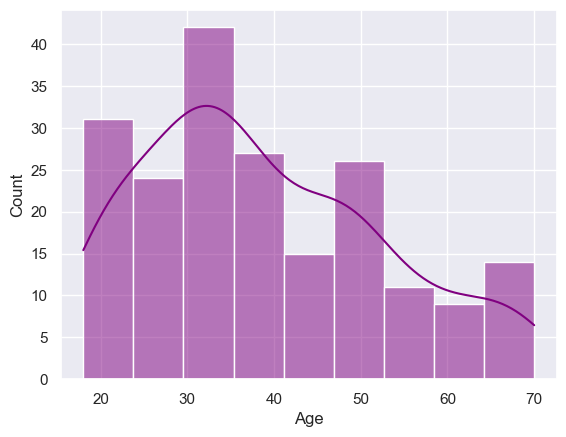

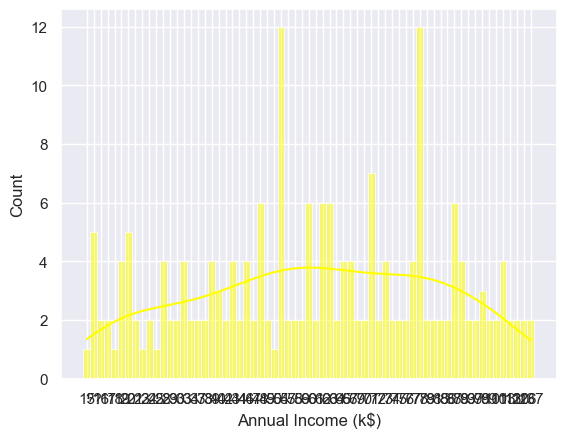

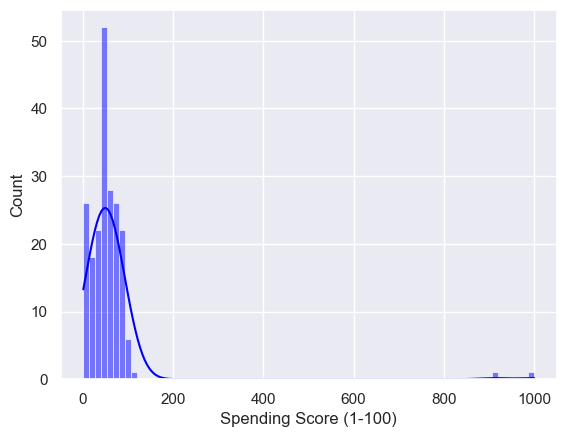

In [49]:
# EDA.5 -> Plotting height and weight distribuation and as you can see they have a normal distribuation

# تنظیمات اولیه برای Seaborn
sns.set()
# ایجاد هیستوگرام برای ستون 'Age' به همراه منحنی KDE
data_Age = df['Age']
sns.histplot(data=data_Age, kde=True, color='purple')
plt.show()

# ایجاد هیستوگرام برای ستون 'Annual Income (k$)' به همراه منحنی KDE
data_Income = df['Annual Income (k$)']
sns.histplot(data=data_Income, kde=True, color='yellow')
plt.show()

# ایجاد هیستوگرام برای ستون 'Spending Score (1-100)' به همراه منحنی KDE
data_Score = df['Spending Score (1-100)']
sns.histplot(data=data_Score, kde=True, color='blue')
plt.show()

# هیستوگرام‌های مختلف را برای ویژگی‌های سنی، درآمد سالانه و امتیاز هزینه مشتریان 


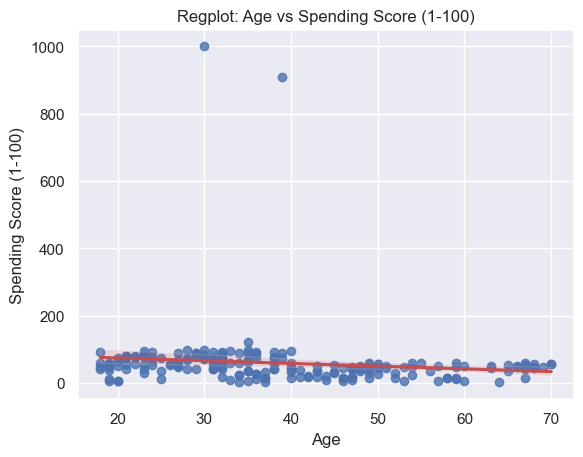

In [50]:
# رسم نمودار با استفاده از Seaborn
# x: ستون 'Age' به عنوان محور افقی
# y: ستون 'Spending Score (1-100)' به عنوان محور عمودی
sns.regplot(data=df, x="Age", y="Spending Score (1-100)", line_kws=dict(color="r"))

# تنظیم عنوان نمودار به 'Regplot: Age vs Spending Score (1-100)'
plt.title('Regplot: Age vs Spending Score (1-100)') 
plt.show() 




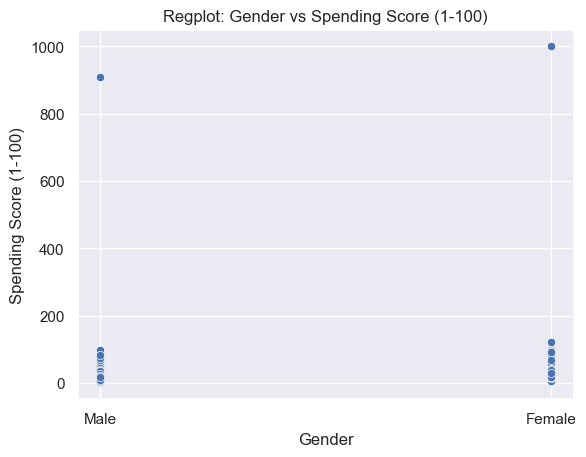

In [51]:
sns.scatterplot(data=df, x="Gender", y="Spending Score (1-100)")

plt.title('Regplot: Gender vs Spending Score (1-100)') 
plt.show() 




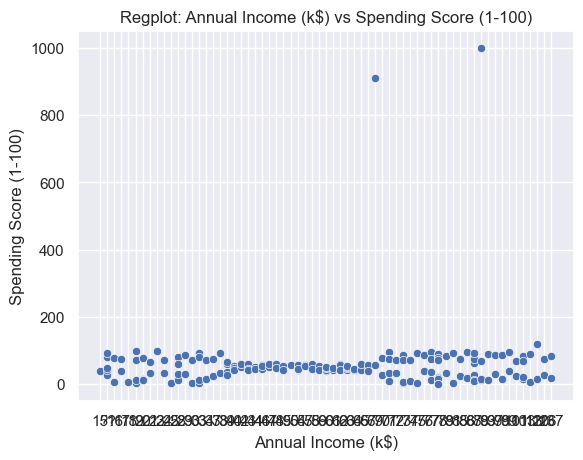

In [52]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")

plt.title('Regplot: Annual Income (k$) vs Spending Score (1-100)') 
plt.show() 



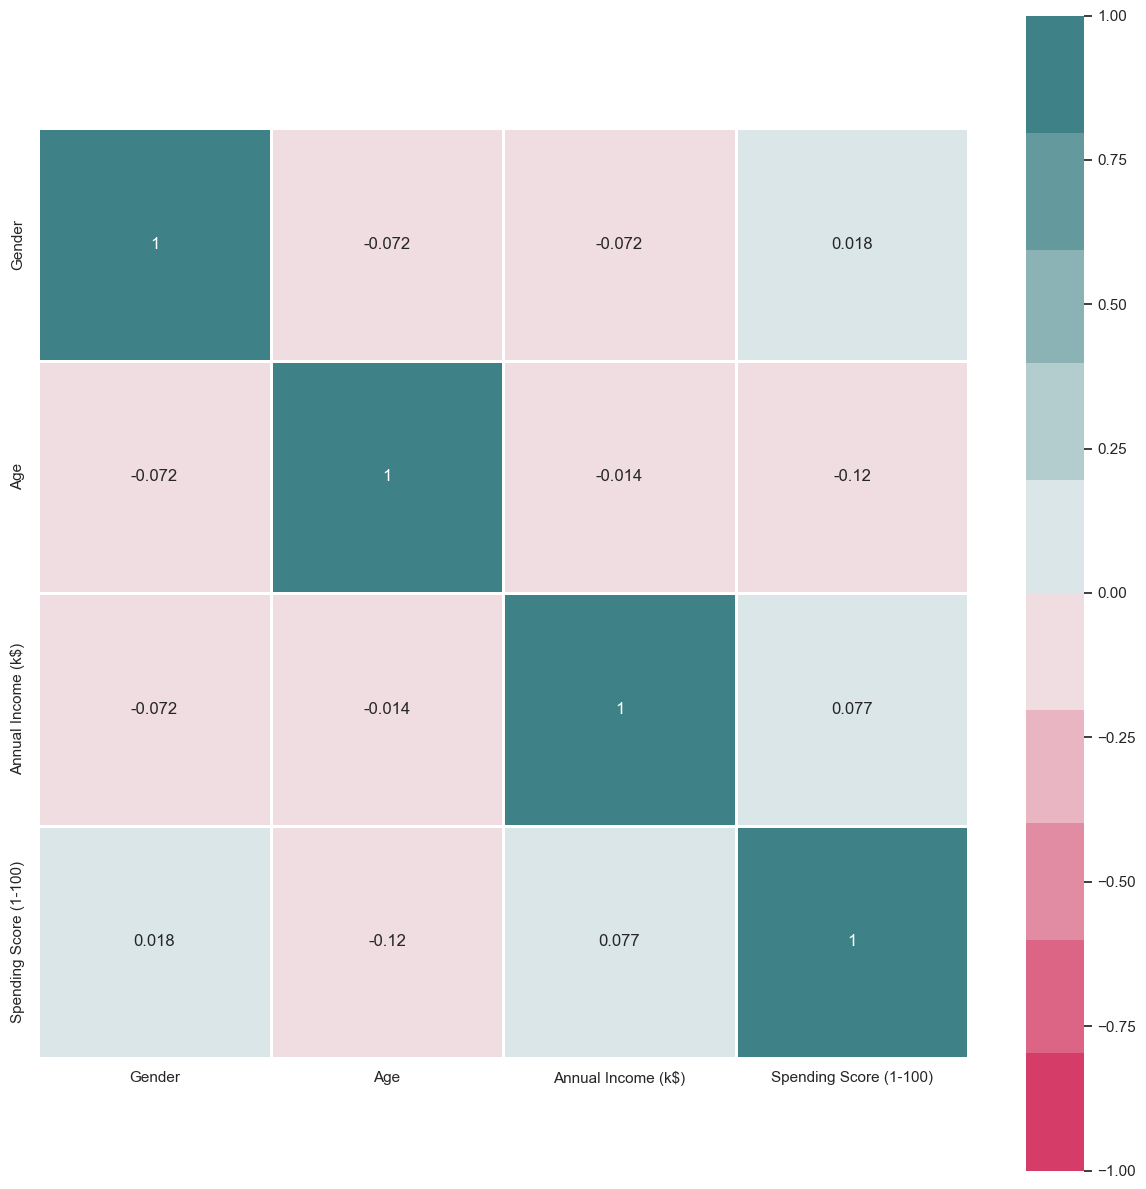

In [68]:
#import seaborn as sns
# seaborn: برای رسم Heatmap و نمودارهای آماری

#import matplotlib.pyplot as plt
# matplotlib: برای رسم نمودارها

#(heatmap)ترسیم هیت‌مپ
#sns.heatmap()
#تابعی است که از کتابخانه
#Seaborn 
#برای ترسیم هیت‌مپ استفاده می‌کند 
#برای ترسیم هیت‌مپ از ماتریس همبستگی(correlation matrix) استفاده می‌کند.
#هیت‌مپ یک نمودار است که با استفاده از رنگ‌ها، همبستگی میان متغیرها را نمایش می‌دهد.

d_f = df.copy().drop('CustomerID', axis=1)
d_f['Gender'] = d_f['Gender'].map({'Male': 0, 'Female': 1})
d_f['Annual Income (k$)'] = d_f['Annual Income (k$)'].apply(pd.to_numeric,errors="coerce")

fig, ax = plt.subplots(figsize=(15,15))

# 1. axis_corr: این خط کد یک متغیر است که به نتیجه اجرای تابع 
# sns.heatmap() 
#اختصاص داده می‌شود
# این متغیر می‌تواند بعداً برای
# دسترسی به هیت‌مپ استفاده شود
axis_corr = sns.heatmap(
#df.corr() 
#محاسبه ماتریس همبستگی را انجام می‌دهد    
d_f.corr(),
#vmin=-1, vmax=1, center=0
# تنظیم می‌کند که محدوده رنگ‌ها از -1 همبستگی منفی کامل تا 
#+1همبستگی مثبت کامل
# باشد و رنگ سفید به مقدار 0عدم همبستگی نشان داده شود
vmin=-1, vmax=1, center=0,
# cmap=sns.diverging_palette(1, 200, n=10)
#تنظیم می‌کند که از پالت
#رنگی متمایز
#(diverging) استفاده شود
#3. 1, 200, n=10: این پارامترها مشخص می‌کنند که چگونه پالت رنگی ساخته شود:
# - 1: نقطه شروع طیف رنگی (در اینجا 1 معادل آبی است)
#   - 200: نقطه پایان طیف رنگی (در اینجا 200 معادل قرمز است)
# n=10: تعداد رنگ‌هایی که در پالت استفاده می‌شود (در اینجا 10 رنگ)

cmap=sns.diverging_palette(1, 200, n=10),
#square=True باعث می‌شود که سلول‌های ماتریس مربعی باشند
#linewidth=1 عرض خطوط جداکننده سلول‌ها را مشخص می‌کند
square=True , annot=True, linewidth=1, ax=ax)

#این کد در پایتون با استفاده از کتابخانه Matplotlib به نمایش درآوردن یک نمودار است.
plt.show()


# Data Cleaning

In [393]:
# ایجاد یک نمونه از کلاس LabelEncoder برای تبدیل مقادیر دسته‌بندی به اعداد
encoder = LabelEncoder() 
# تبدیل ستون 'Gender' از مقادیر دسته‌بندی به اعداد
df['Gender']= encoder.fit_transform(df['Gender'])


In [394]:

#در این خط، از تابع apply() بر روی  دیتا فریم استفاده میکنیم تا تابع
# pd.to_numeric() را بر روی ستون‌های مشخص شده اجرا کنیم
# این تابع به هر سلول در ستون‌ها تلاش می‌کند تا آن را به نوع عددی تبدیل کند
# در صورتی که تبدیل ممکن نباشد، مقدار سلول به NaN (Not a Number) تغییر خواهد کرد.
# پارامتر errors="coerce" نیز برای تبدیل خطاها به NaN استفاده می‌شود.
# برای تعیین رفتار تابع در مواجهه با خطاهای تبدیل استفاده می‌شود
# اگر در ستونی که قرار است تبدیل شود، مقدار "؟؟" وجود داشته باشد، این مقدار در حالت پیش‌فرض به خطا منجر می‌شود 
# اما الان به نان تبدیل میشود و فرایند ادامه می یابد
#  این رفتار معمولاً در مواقعی که می‌خواهیم داده‌های نامعتبر را به شکلی مشخص
# مشخص کنیم و عملیات دیگری بر روی داده‌ها انجام دهیم، مورد استفاده قرار می‌گیرد.

df['Annual Income (k$)'] = df['Annual Income (k$)'].apply(pd.to_numeric,errors="coerce")

print(df.dtypes)

CustomerID                  int64
Gender                      int32
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)      int64
dtype: object


In [395]:
#جمع مقادیر خالی یا  null هر فیچر
print(df.isna().sum())
print('--------------------------------')
#جمع مقادیر تکراری یا  duplicate هر فیچر
print(df.duplicated().sum())


CustomerID                0
Gender                    0
Age                       4
Annual Income (k$)        6
Spending Score (1-100)    0
dtype: int64
--------------------------------
3


In [396]:
# حذف ردیف‌های تکراری از DataFrame
df = df.drop_duplicates()
# تابع drop_duplicates() برای حذف ردیف‌های تکراری از DataFrame استفاده می‌شود و DataFrame پاکسازی شده را بازمی‌گرداند.
print(len(df))
# تابع len() تعداد عناصر را برمی‌گرداند. اینجا تعداد ردیف‌های DataFrame پس از حذف تکرارها چاپ می‌شود.
print(df.duplicated().sum())
# تابع duplicated() برای یافتن ردیف‌های تکراری در DataFrame استفاده می‌شود. سپس با استفاده از sum()، تعداد ردیف‌های تکراری چاپ می‌شود.


200
0


In [397]:
# با استفاده از مقادیر موجود در دیتاست و بر اساس شباهت‌های میان مقادیر موجود، برای هر مقدار ناپذیرفتنی، مقداری را جایگزین می‌کند که مشابه‌ترین مقادیر موجود به آن مقدار ناپذیرفتنی باشد.
# این روش می‌تواند مفید باشد زمانی که مقادیر missing در دیتاست به صورت پراکنده و در نقاط مختلف باشند و می‌توانند با استفاده از مقادیر موجود در دیتاست تخمین زده شوند.
#from sklearn.impute import KNNImputer 
# Create a KNN Imputer with n_neighbors=5 
# ایجاد یک نمونه از کلاس KNNImputer با n_neighbors=5

imputer = KNNImputer(n_neighbors=5) 
 
# تعیین ستون‌های عددی که مقادیر ناپذیرفتنی باید جایگزین شوند
# Impute missing values in numerical columns 
numerical_columns = [ 'Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)'] 

# جایگزینی مقادیر ناپذیرفتنی در ستون‌های عددی با استفاده از روش KNNImputer
imputed_data = imputer.fit_transform(df[numerical_columns]) 

# جایگزینی مقادیر ناپذیرفتنی در داده اصلی DataFrame با مقادیر تکمیل‌شده
# Replace missing values in the original DataFrame 
df[numerical_columns] = imputed_data 

In [398]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

outlier

In [399]:
threshold = 2.5
df['Spending_Score_z_score'] = df.groupby(['Gender'])['Spending Score (1-100)'].transform(lambda x: stats.zscore(x))
df['Annual_Income_z_score'] = df.groupby(['Gender'])['Annual Income (k$)'].transform(lambda x: stats.zscore(x))

df['Spending_Score_z_score'].fillna(0, inplace=True)
df['Annual_Income_z_score'].fillna(0, inplace=True)


C:\Users\Sogand\AppData\Local\Temp\ipykernel_5204\859655418.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Spending_Score_z_score'].fillna(0, inplace=True)
C:\Users\Sogand\AppData\Local\Temp\ipykernel_5204\859655418.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

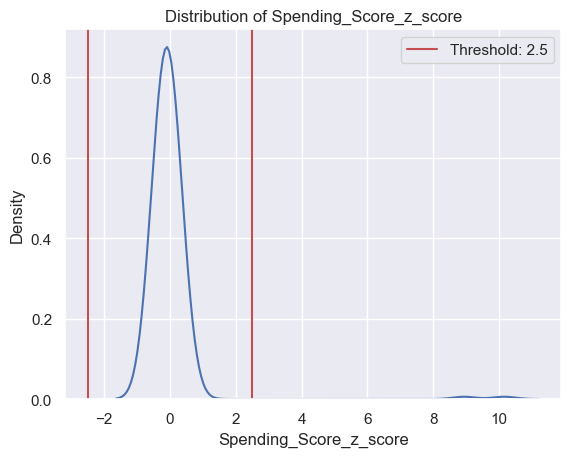

'\n\nتحلیل نمودار Distribution of Annual Income (k$) z_score:\nاین نمودار توزیع نمرات z سالانه درآمد را نشان می\u200cدهد. چند نکته قابل توجه:\n\nمرکز توزیع: نمودار حول مقدار صفر متمرکز شده است که نشان\u200cدهنده میانگین درآمد است.\nچند قلویی (Multimodal): نمودار چند قله دارد که به معنای وجود چندین گروه با درآمدهای مختلف است.\nآستانه های قرمز: خطوط قرمز در ±3 نشان\u200cدهنده آستانه\u200cهای معمول برای تشخیص داده\u200cهای دورافتاده (outliers) هستند. مقادیر خارج از این محدوده به عنوان دورافتاده در نظر گرفته می\u200cشوند.\nتراکم بالا: بیشترین تراکم داده\u200cها در محدوده نزدیک به میانگین (صفر) قرار دارد.\nاین نمودار نشان می\u200cدهد که توزیع درآمد سالانه به صورت چند قله\u200cای است و مقدار زیادی از داده\u200cها در محدوده ±3 انحراف استاندارد از میانگین قرار دارند.\n\n'

In [400]:
# Visualize the distribution of area z-scores

sns.kdeplot(df['Spending_Score_z_score'])

# Indicating the threshold
plt.axvline(threshold, color='r', label=f'Threshold: {threshold}')
plt.axvline(-threshold, color='r')

plt.title("Distribution of Spending_Score_z_score")
plt.legend()
plt.show()


"""

تحلیل نمودار Distribution of Annual Income (k$) z_score:
این نمودار توزیع نمرات z سالانه درآمد را نشان می‌دهد. چند نکته قابل توجه:

مرکز توزیع: نمودار حول مقدار صفر متمرکز شده است که نشان‌دهنده میانگین درآمد است.
چند قلویی (Multimodal): نمودار چند قله دارد که به معنای وجود چندین گروه با درآمدهای مختلف است.
آستانه های قرمز: خطوط قرمز در ±3 نشان‌دهنده آستانه‌های معمول برای تشخیص داده‌های دورافتاده (outliers) هستند. مقادیر خارج از این محدوده به عنوان دورافتاده در نظر گرفته می‌شوند.
تراکم بالا: بیشترین تراکم داده‌ها در محدوده نزدیک به میانگین (صفر) قرار دارد.
این نمودار نشان می‌دهد که توزیع درآمد سالانه به صورت چند قله‌ای است و مقدار زیادی از داده‌ها در محدوده ±3 انحراف استاندارد از میانگین قرار دارند.

"""

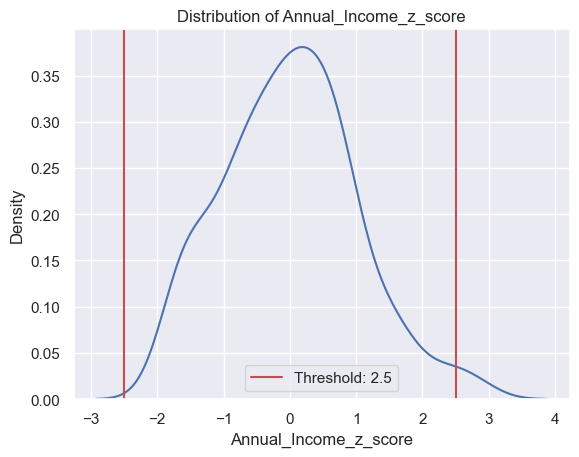

'\n\nنمودار بالا توزیع نمره z سن (Age_z_score) را نشان می\u200cدهد. در این نمودار، خطوط قرمز رنگ به عنوان آستانه\u200cهای z برابر ۳ و -۳ نشان داده شده\u200cاند. این خطوط مرزهایی را تعیین می\u200cکنند که نقاط داده\u200cای خارج از آنها به عنوان دورافتاده (outlier) در نظر گرفته می\u200cشوند.\n\nتحلیل:\nتوزیع داده\u200cها: دو قله در توزیع نشان\u200cدهنده این است که داده\u200cهای سنی دارای دو گروه اصلی با میانگین\u200cهای مختلف هستند.\nدورافتاده\u200cها: تعداد کمی از داده\u200cها خارج از آستانه\u200cهای ۳ و -۳ قرار دارند. این نشان می\u200cدهد که اکثر داده\u200cها در محدوده معمولی قرار دارند و تنها تعداد کمی از داده\u200cها دورافتاده هستند.\n\n'

In [401]:
# Visualize the distribution of room z-scores
sns.kdeplot(df['Annual_Income_z_score'])

# Indicating the threshold
plt.axvline(threshold, color='r', label=f'Threshold: {threshold}')
plt.axvline(-threshold, color='r')

plt.title("Distribution of Annual_Income_z_score")
plt.legend()
plt.show()


"""

نمودار بالا توزیع نمره z سن (Age_z_score) را نشان می‌دهد. در این نمودار، خطوط قرمز رنگ به عنوان آستانه‌های z برابر ۳ و -۳ نشان داده شده‌اند. این خطوط مرزهایی را تعیین می‌کنند که نقاط داده‌ای خارج از آنها به عنوان دورافتاده (outlier) در نظر گرفته می‌شوند.

تحلیل:
توزیع داده‌ها: دو قله در توزیع نشان‌دهنده این است که داده‌های سنی دارای دو گروه اصلی با میانگین‌های مختلف هستند.
دورافتاده‌ها: تعداد کمی از داده‌ها خارج از آستانه‌های ۳ و -۳ قرار دارند. این نشان می‌دهد که اکثر داده‌ها در محدوده معمولی قرار دارند و تنها تعداد کمی از داده‌ها دورافتاده هستند.

"""

In [402]:
df['Spending_Score_outlier'] = False
df['Annual_Income_outlier'] = False
df.loc[(df['Spending_Score_z_score'] > threshold) | (df['Spending_Score_z_score'] < (-1*threshold)), 'Spending_Score_outlier'] = True
df.loc[(df['Annual_Income_z_score'] > threshold) | (df['Annual_Income_z_score'] < (-1*threshold)), 'Annual_Income_outlier'] = True


In [403]:
df.loc[(df['Spending_Score_outlier'] == True) | (df['Annual_Income_outlier'] == True)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending_Score_z_score,Annual_Income_z_score,Spending_Score_outlier,Annual_Income_outlier
124,124,1.0,39.0,69.0,910.0,8.935295,0.208293,True,False
177,176,0.0,30.0,88.0,1000.0,10.159179,1.109191,True,False
199,197,0.0,45.0,126.0,28.0,-0.346443,2.595563,False,True
201,199,1.0,32.0,137.0,18.0,-0.417502,2.836778,False,True
202,200,1.0,30.0,137.0,83.0,0.264036,2.836778,False,True


In [404]:
df = df.loc[(df['Spending_Score_outlier'] == False) & (df['Annual_Income_outlier'] == False)]

# Data Normalization

In [405]:
from sklearn.preprocessing import StandardScaler

features = df[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]

# ایجاد شیء StandardScaler
scaler = StandardScaler().fit(features)

# اعمال نرمال‌سازی به داده‌ها
df_normalized = scaler.fit_transform(features)

# تبدیل به دیتافریم
df_normalized = pd.DataFrame(data=df_normalized, columns=features.columns)

# نمایش چند سطر اول دیتافریم نرمال شده
print(df_normalized.head())


        Age    Gender  Annual Income (k$)  Spending Score (1-100)
0 -1.412177  1.137593           -1.847955               -0.429028
1 -1.269200  1.137593           -1.593950                1.190207
2 -1.340689 -0.879049           -1.806987               -1.701284
3 -1.126222 -0.879049           -1.806987                1.035994
4 -0.554313 -0.879049           -1.766018               -0.390475


PCA

In [406]:
"""
PCA (تحلیل مؤلفه‌های اصلی) یک تکنیک کاهش ابعاد است که به منظور کاهش تعداد ویژگی‌های داده‌ها با حفظ بیشترین میزان تنوع واریانس آنها به کار می‌رود. این روش ترکیبی خطی از ویژگی‌ها را ایجاد می‌کند که به عنوان مؤلفه‌های اصلی شناخته می‌شوند. هدف اصلی PCA کاهش ابعاد داده‌ها برای تحلیل و بصری‌سازی آسان‌تر است.
"""
from sklearn.decomposition import PCA

# انتخاب فیچرها برای کاهش ابعاد



# اعمال PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_normalized)

# تبدیل به دیتافریم
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

# نمایش چند سطر اول دیتافریم بعد از PCA
print(df_pca.head())







       PCA1      PCA2
0 -0.335010 -0.788081
1 -1.338790 -0.314537
2  0.013555 -2.160610
3 -1.698168 -1.697790
4 -0.342022 -1.945718


# Processing

Finding the optimal hyperparameters

K means

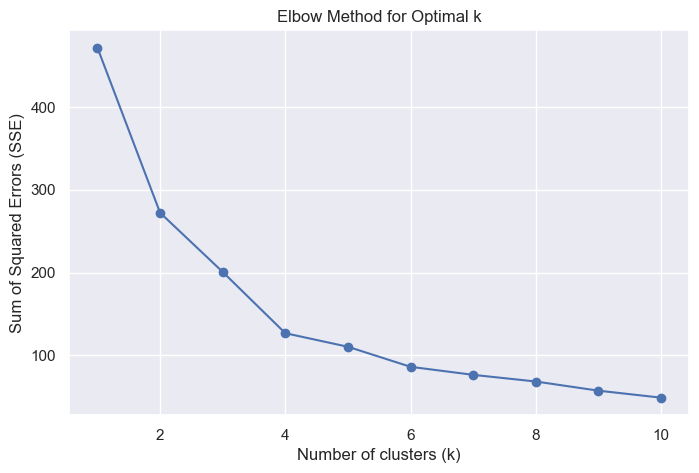

'\nشناسایی نقطه Elbow:\nنقطه\u200cای که در آن کاهش SSE\nکندتر می\u200cشود و نمودار به شکل یک "آرنج" خم می\u200cشود، به عنوان تعداد بهینه خوشه\u200cها انتخاب می\u200cشود.\nشکل نمودار:\n\nنمودار نشان می\u200cدهد که با افزایش تعداد خوشه\u200cها، مقدار SSE کاهش می\u200cیابد.\nدر ابتدا، کاهش SSE سریع است، اما پس از نقطه\u200cای خاص، کاهش SSE به طرز محسوسی کندتر می\u200cشود.\nنقطه Elbow:\n\nنقطه Elbow جایی است که کاهش SSE به طور قابل توجهی کندتر می\u200cشود.\nدر نمودار ارائه شده، این نقطه به نظر می\u200cرسد در حدود k = 4 یا k = 5 باشد. از این نقطه به بعد، کاهش SSE به نسبت کمتری اتفاق می\u200cافتد.\nنتیجه\u200cگیری:\nبا توجه به نمودار Elbow، تعداد بهینه خوشه\u200cها برای الگوریتم K-means به احتمال زیاد 4 یا 5 است. این تعداد خوشه تعادلی بین کاهش خطا و پیچیدگی مدل ایجاد می\u200cکند.\n'

In [407]:

from sklearn.cluster import KMeans

"""
روش Elbow
یک تکنیک برای تعیین تعداد بهینه خوشه‌ها در الگوریتم
K-means 
است
در این روش، نموداری از مجموع مربعات خطا
Sum of Squared Errors یا SSE
را در مقابل تعداد خوشه‌ها رسم می‌کنیم. سپس تعداد خوشه‌ها را جایی انتخاب می‌کنیم که نمودار به شکل یک
 "آرنج" (elbow)
 ظاهر شود. این نقطه نشان‌دهنده تعادل بین کاهش
 SSE 
 و افزایش تعداد خوشه‌ها است.
مراحل استفاده از روش Elbow
اجرای K-means برای مقادیر مختلف k:
برای هر مقدار k از 1 تا یک مقدار مشخص
الگوریتم K-means را اجرا می‌کنیم
و SSE را محاسبه می‌کنیم.
"""
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

"""
رسم نمودار Elbow:
نموداری از SSE در مقابل تعداد خوشه‌ها رسم می‌کنیم.
"""


# رسم نمودار Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()



"""
شناسایی نقطه Elbow:
نقطه‌ای که در آن کاهش SSE
کندتر می‌شود و نمودار به شکل یک "آرنج" خم می‌شود، به عنوان تعداد بهینه خوشه‌ها انتخاب می‌شود.
شکل نمودار:

نمودار نشان می‌دهد که با افزایش تعداد خوشه‌ها، مقدار SSE کاهش می‌یابد.
در ابتدا، کاهش SSE سریع است، اما پس از نقطه‌ای خاص، کاهش SSE به طرز محسوسی کندتر می‌شود.
نقطه Elbow:

نقطه Elbow جایی است که کاهش SSE به طور قابل توجهی کندتر می‌شود.
در نمودار ارائه شده، این نقطه به نظر می‌رسد در حدود k = 4 یا k = 5 باشد. از این نقطه به بعد، کاهش SSE به نسبت کمتری اتفاق می‌افتد.
نتیجه‌گیری:
با توجه به نمودار Elbow، تعداد بهینه خوشه‌ها برای الگوریتم K-means به احتمال زیاد 4 یا 5 است. این تعداد خوشه تعادلی بین کاهش خطا و پیچیدگی مدل ایجاد می‌کند.
"""



DBSCAN 

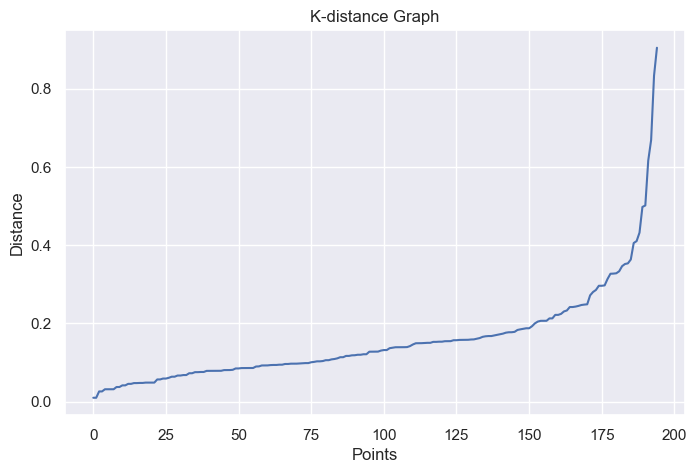

In [408]:
"""
یک الگوریتم خوشه‌بندی مبتنی بر تراکم است که می‌تواند خوشه‌هایی با شکل‌های دلخواه را شناسایی کند و نقاط نویز  را از داده‌ها جدا کند.  به دو پارامتر اصلی نیاز دارد:
Epsilon (ε): شعاعی که در اطراف هر نقطه برای جستجوی نقاط همسایه کشیده می‌شود.
MinPoints (MinPts): حداقل تعداد نقاطی که باید در داخل شعاع ε
باشند تا نقطه مرکزی یک نقطه هسته‌ای
(core point) تلقی شود

MinPoints (MinPts) 
حداقل تعداد نقاطی است که باید در شعاع ε از یک نقطه قرار گیرند تا آن نقطه به عنوان یک نقطه هسته‌ای شناخته شود
 انتخاب مقدار مناسب برای آن معمولاً به تعداد کل نمونه‌ها و ماهیت داده‌ها بستگی دارد
  به طور معمول، مقدار  آن 
باید حداقل برابر با بعد داده‌ها باشد

Epsilon (ε)
شعاعی است که در اطراف هر نقطه کشیده می‌شود تا همسایه‌های آن نقطه را پیدا کند. 
نقطه‌ای که حداقل 
MinPts
همسایه در این شعاع داشته باشد به عنوان نقطه هسته‌ای شناخته می‌شود.

Grid Search 
یک روش جستجوی پارامتری است که مقادیر مختلفی برای پارامترهای الگوریتم امتحان می‌کند تا بهترین ترکیب پارامترها را پیدا کند.
برای DBSCAN
ما مقادیر مختلفی برای 
ε و MinPts
را امتحان می‌کنیم و می‌بینیم که کدام ترکیب بهترین نتیجه را ارائه می‌دهد.
"""



from sklearn.neighbors import NearestNeighbors

# بهترین min point
minPt = 2 * df_normalized.shape[1]

# پیدا کردن نزدیک‌ترین همسایه‌ها
neigh = NearestNeighbors(n_neighbors=minPt)
nbrs = neigh.fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

# مرتب‌سازی فاصله‌ها
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('K-distance Graph')
plt.show()





In [409]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


eps_range = np.arange(0.1, 2.5, 0.1)

best_eps = 0
best_minPts = 0
best_score = -1


for eps in eps_range:
    db = DBSCAN(eps=eps, min_samples=minPt).fit(df_pca)
    labels = db.labels_
    if len(set(labels)) > 1:  # بررسی می‌کنیم که حداقل دو خوشه وجود داشته باشد
        score = silhouette_score(df_pca, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
            

print(f'Best Epsilon: {best_eps}')

print(f'Best Silhouette Score: {best_score}')







Best Epsilon: 0.9
Best Silhouette Score: 0.36858871969866475


# Modeling

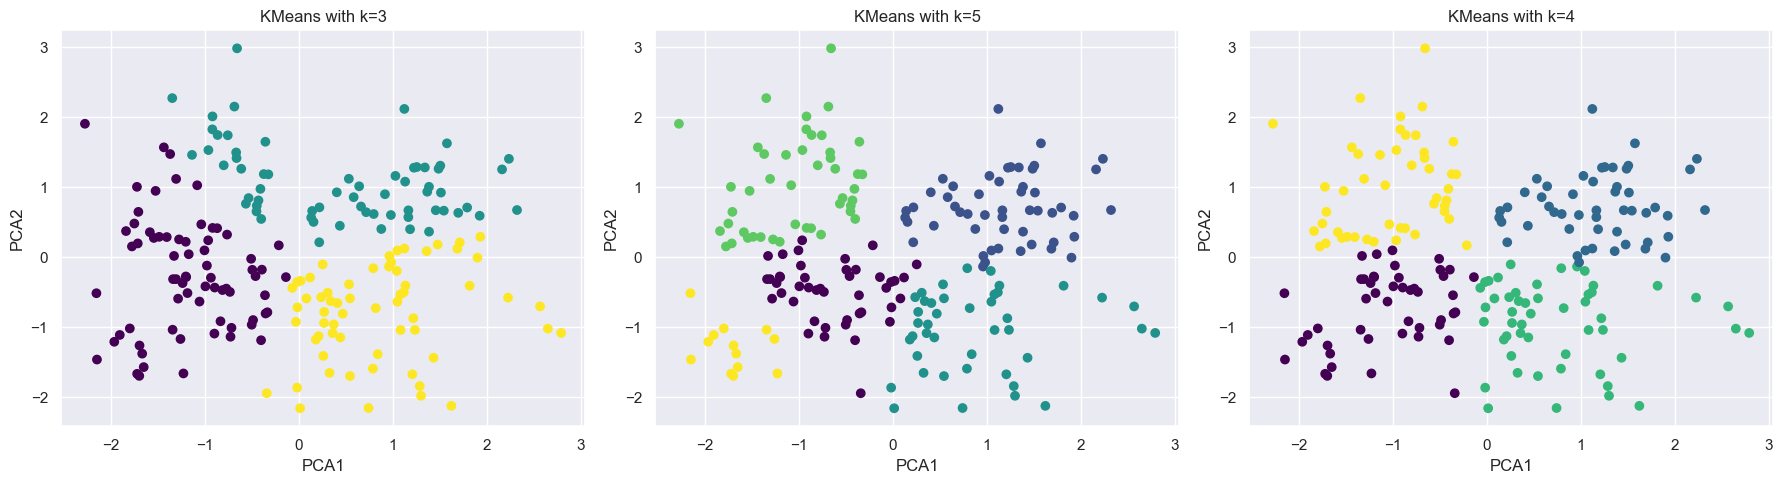

In [410]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# مقادیر متفاوت K
k1 = 3
k2 = 5
optimal_k = 4  # فرض کنید این مقدار بهینه است که در قسمت قبلی پیدا کرده‌اید

# فیت کردن مدل KMeans با k1
kmeans_k1 = KMeans(n_clusters=k1, random_state=42)
kmeans_k1.fit_predict(df_pca)
cluster_k1 = kmeans_k1.labels_

# فیت کردن مدل KMeans با k2
kmeans_k2 = KMeans(n_clusters=k2, random_state=42)
kmeans_k2.fit_predict(df_pca)
cluster_k2 = kmeans_k2.labels_

# فیت کردن مدل KMeans با optimal_k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit_predict(df_pca)
cluster_optimal = kmeans_optimal.labels_

# رسم نمودار پراکنش برای هر مقدار K
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=cluster_k1, cmap='viridis')

axes[0].set_title(f'KMeans with k={k1}')
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')

axes[1].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=cluster_k2, cmap='viridis')
axes[1].set_title(f'KMeans with k={k2}')
axes[1].set_xlabel('PCA1')
axes[1].set_ylabel('PCA2')

axes[2].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=cluster_optimal, cmap='viridis')
axes[2].set_title(f'KMeans with k={optimal_k}')
axes[2].set_xlabel('PCA1')
axes[2].set_ylabel('PCA2')

plt.tight_layout()
plt.show()


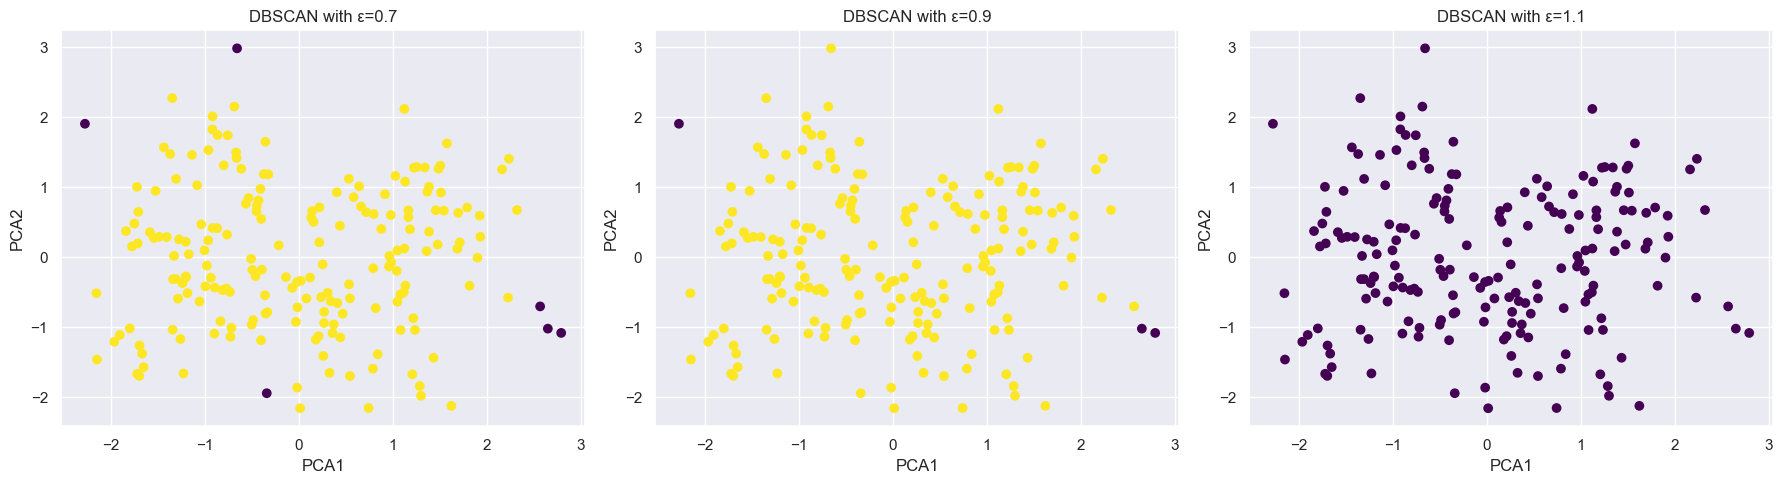

Epsilon: 0.7, Silhouette Score: 0.34200620589685016
Epsilon: 0.9, Silhouette Score: 0.36858871969866475
Epsilon: 1.1, Silhouette Score: -1


'    \n\nمقادیر ε:\n\nدر اینجا از ۳ مقدار متفاوت برای ε استفاده شده است: ۰.۷، ۰.۹ (مقدار بهینه)، و ۱.۱. شما می\u200cتوانید این مقادیر را بر اساس نیاز خود تغییر دهید.\nفیت کردن مدل DBSCAN:\n\nمدل DBSCAN با ε و min_samples=3 فیت می\u200cشود.\nمحاسبه سیلوئت اسکور:\n\nسیلوئت اسکور برای ارزیابی کیفیت خوشه\u200cها استفاده می\u200cشود. اگر تنها یک خوشه وجود داشته باشد (یعنی همه نقاط به یک خوشه تعلق داشته باشند)، سیلوئت اسکور برابر -۱ در نظر گرفته می\u200cشود.\nرسم نمودار پراکنش:\n\nنمودار پراکنش برای نمایش نتایج خوشه\u200cبندی با مقادیر مختلف ε رسم می\u200cشود.\nنمایش سیلوئت اسکورها:\n\nسیلوئت اسکورها برای مقادیر مختلف ε چاپ می\u200cشوند تا بتوانید مقایسه کنید که کدام مقدار ε بهتر عمل کرده است.\nنتایج\nبا استفاده از این کد، شما می\u200cتوانید نتایج فیت مدل DBSCAN با مقادیر مختلف ε را مشاهده کرده و سیلوئت اسکورها را مقایسه کنید. این مقایسه به شما کمک می\u200cکند تا ببینید که کدام مقدار ε برای داده\u200cهای شما مناسب\u200cتر است.\n\n'

In [411]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# مقادیر متفاوت برای ε
epsilon_values = [0.7, 0.9, 1.1]  # مقدار بهینه 0.9 است و دو مقدار دیگر کمتر و بیشتر از آن

# داده‌های نمونه را بارگذاری کنید (فرض کنید df_normalized یک DataFrame است که داده‌های نرمال‌شده را دارد)
df_array = df_pca.to_numpy()  # تبدیل DataFrame به NumPy Array برای راحتی

# آماده‌سازی برای رسم نمودار
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# لیست برای ذخیره‌ی سیلوئت اسکورها
silhouette_scores = []

for i, epsilon in enumerate(epsilon_values):
    # فیت کردن مدل DBSCAN با ε مشخص شده
    dbscan = DBSCAN(eps=epsilon, min_samples=minPt)
    dbscan.fit(df_array)
    labels = dbscan.labels_

    # محاسبه سیلوئت اسکور (فقط برای برچسب‌های معتبر، -1 نشان‌دهنده نقاط نویز است)
    if len(set(labels)) > 1:  # اگر بیش از یک خوشه وجود داشته باشد
        silhouette_avg = silhouette_score(df_array, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_avg = -1  # برای حالت‌هایی که تنها یک خوشه وجود دارد (همه به یک خوشه تعلق دارند)
        silhouette_scores.append(silhouette_avg)

    # رسم نمودار پراکنش
    axes[i].scatter(df_array[:, 0], df_array[:, 1], c=labels, cmap='viridis', marker='o')
    axes[i].set_title(f'DBSCAN with ε={epsilon}')
    axes[i].set_xlabel('PCA1')
    axes[i].set_ylabel('PCA2')

plt.tight_layout()
plt.show()

# نمایش سیلوئت اسکورها برای مقادیر مختلف ε
for epsilon, score in zip(epsilon_values, silhouette_scores):
    print(f'Epsilon: {epsilon}, Silhouette Score: {score}')




"""    

مقادیر ε:

در اینجا از ۳ مقدار متفاوت برای ε استفاده شده است: ۰.۷، ۰.۹ (مقدار بهینه)، و ۱.۱. شما می‌توانید این مقادیر را بر اساس نیاز خود تغییر دهید.
فیت کردن مدل DBSCAN:

مدل DBSCAN با ε و min_samples=3 فیت می‌شود.
محاسبه سیلوئت اسکور:

سیلوئت اسکور برای ارزیابی کیفیت خوشه‌ها استفاده می‌شود. اگر تنها یک خوشه وجود داشته باشد (یعنی همه نقاط به یک خوشه تعلق داشته باشند)، سیلوئت اسکور برابر -۱ در نظر گرفته می‌شود.
رسم نمودار پراکنش:

نمودار پراکنش برای نمایش نتایج خوشه‌بندی با مقادیر مختلف ε رسم می‌شود.
نمایش سیلوئت اسکورها:

سیلوئت اسکورها برای مقادیر مختلف ε چاپ می‌شوند تا بتوانید مقایسه کنید که کدام مقدار ε بهتر عمل کرده است.
نتایج
با استفاده از این کد، شما می‌توانید نتایج فیت مدل DBSCAN با مقادیر مختلف ε را مشاهده کرده و سیلوئت اسکورها را مقایسه کنید. این مقایسه به شما کمک می‌کند تا ببینید که کدام مقدار ε برای داده‌های شما مناسب‌تر است.

"""


# Evaluation

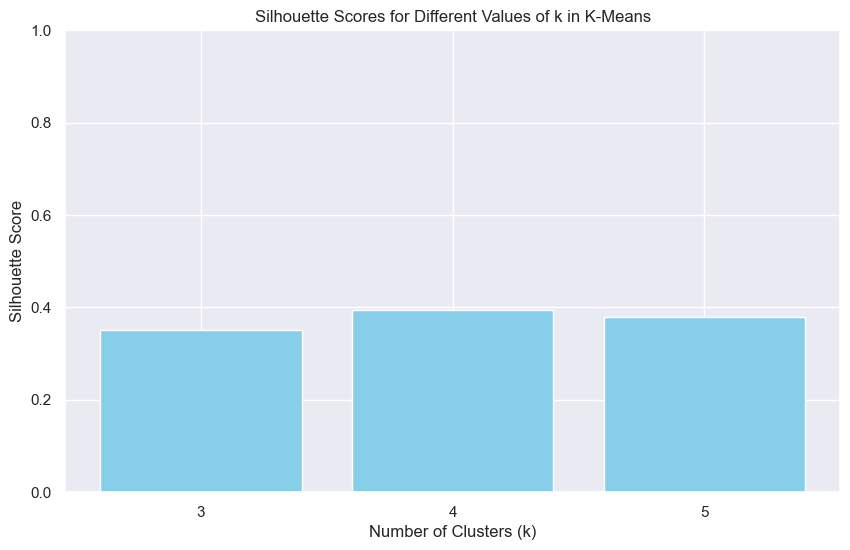

k=3, Silhouette Score: 0.3515529229288097
k=4, Silhouette Score: 0.39414732160956395
k=5, Silhouette Score: 0.3793482948415148


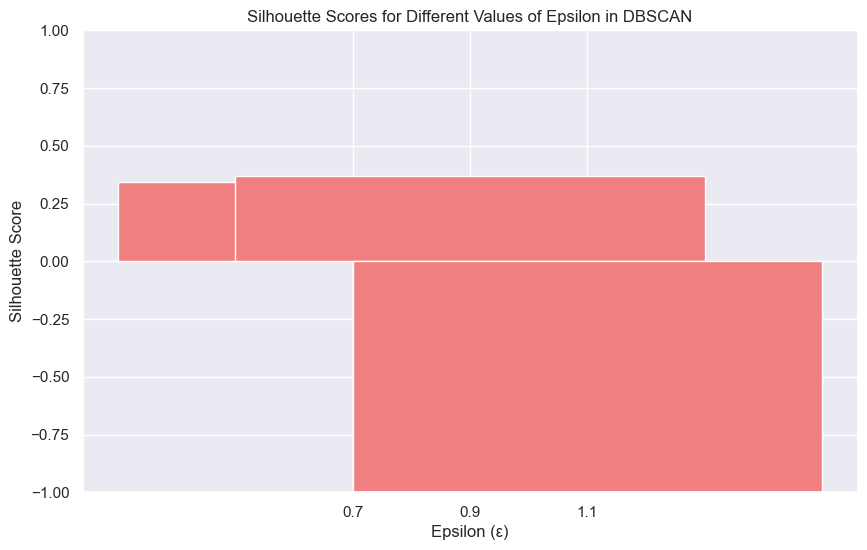

Epsilon: 0.7, Silhouette Score: 0.34200620589685016
Epsilon: 0.9, Silhouette Score: 0.36858871969866475
Epsilon: 1.1, Silhouette Score: -1


In [413]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. ارزیابی مدل K-Means
k_values = [3, 4 , 5]
silhouette_scores_kmeans = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_pca, labels)
    silhouette_scores_kmeans.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.bar(k_values, silhouette_scores_kmeans, color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Values of k in K-Means')
plt.xticks(k_values)
plt.ylim(0, 1)
plt.show()

for k, score in zip(k_values, silhouette_scores_kmeans):
    print(f'k={k}, Silhouette Score: {score}')


# 2. ارزیابی مدل DBSCAN
epsilon_values = [0.7, 0.9, 1.1]
silhouette_scores_dbscan = []

for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=minPt)
    dbscan.fit(df_pca)
    labels = dbscan.labels_

    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(df_pca, labels)
        silhouette_scores_dbscan.append(silhouette_avg)
    else:
        silhouette_avg = -1
        silhouette_scores_dbscan.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.bar(epsilon_values, silhouette_scores_dbscan, color='lightcoral')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Values of Epsilon in DBSCAN')
plt.xticks(epsilon_values)
plt.ylim(-1, 1)
plt.show()

for epsilon, score in zip(epsilon_values, silhouette_scores_dbscan):
    print(f'Epsilon: {epsilon}, Silhouette Score: {score}')




    """


    تعریف مقادیر مختلف:

برای K-Means: سه مقدار مختلف برای 
𝑘
k (۳، ۴ و ۵) انتخاب شده است.
برای DBSCAN: سه مقدار مختلف برای 
𝜖
ϵ (۰.۷، ۰.۹ و ۱.۱) انتخاب شده است.
محاسبه سیلوئت اسکور:

برای K-Means، سیلوئت اسکور برای هر مقدار 
𝑘
k محاسبه شده است.
برای DBSCAN، سیلوئت اسکور برای هر مقدار 
𝜖
ϵ محاسبه شده است. اگر تنها یک خوشه وجود داشته باشد (یعنی همه نقاط به یک خوشه تعلق داشته باشند)، سیلوئت اسکور برابر -۱ در نظر گرفته شده است.
رسم نمودار میله‌ای:

نمودار میله‌ای برای مقایسه سیلوئت اسکورها برای مقادیر مختلف 
𝑘
k و 
𝜖
ϵ رسم شده است.
نمایش سیلوئت اسکورها:

سیلوئت اسکورها برای مقادیر مختلف 
𝑘
k و 
𝜖
ϵ چاپ شده‌اند تا بتوانید مقایسه کنید که کدام مقدار بهترین عملکرد را داشته است.
نمودارها
در پایان، شما دو نمودار میله‌ای به صورت زیر خواهید داشت:

"""


# Visualization

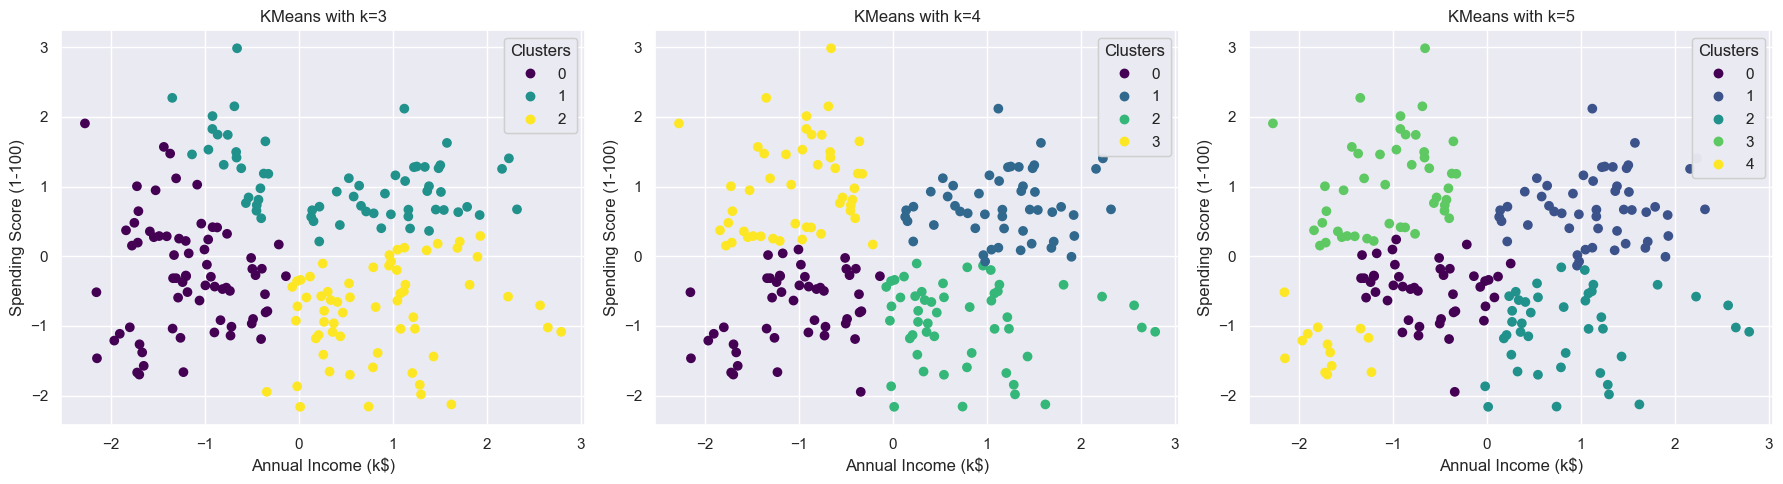

Exception ignored in: <function Forward.__del__ at 0x0000023067FD05E0>
Traceback (most recent call last):
  File "C:\Users\Sogand\AppData\Roaming\Python\Python312\site-packages\pyparsing\core.py", line 5432, in __del__
    self.expr is None
    ^^^^^^^^^
AttributeError: 'Forward' object has no attribute 'expr'


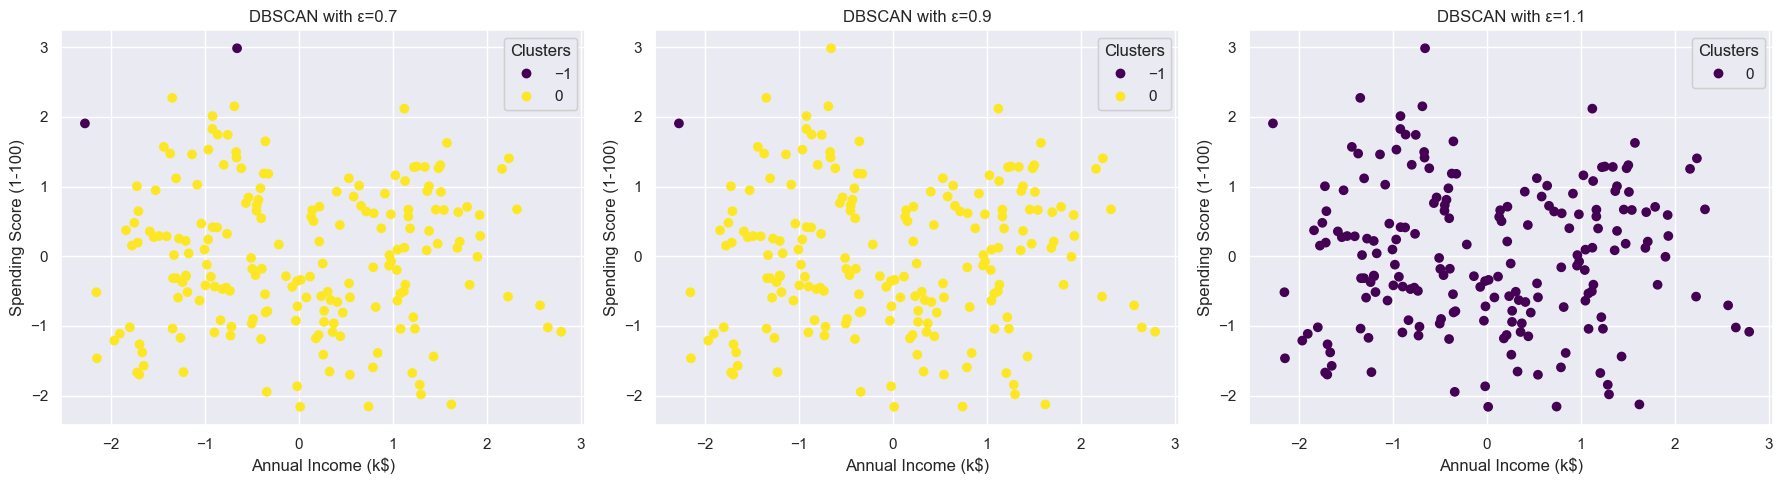

'\nتعریف مقادیر مختلف:\n\nبرای K-Means: سه مقدار مختلف برای \n𝑘\nk (۳، ۴ و ۵) انتخاب شده است.\nبرای DBSCAN: سه مقدار مختلف برای \n𝜖\nϵ (۰.۷، ۰.۹ و ۱.۱) انتخاب شده است.\nفیت کردن مدل\u200cها:\n\nبرای هر مقدار \n𝑘\nk و \n𝜖\nϵ، مدل مربوطه فیت می\u200cشود و برچسب\u200cهای خوشه\u200cها استخراج می\u200cشود.\nرسم نمودار پراکنش:\n\nبرای هر مدل و مقدار پارامتر، نمودار پراکنش رسم می\u200cشود که خوشه\u200cهای شناسایی شده با رنگ\u200cهای مختلف نمایش داده می\u200cشوند.\nاضافه کردن رنگ\u200cنگاری:\n\nرنگ\u200cنگاری برای نمایش برچسب\u200cهای مختلف خوشه\u200cها به نمودار اضافه می\u200cشود.\n'

In [325]:
from sklearn.cluster import KMeans, DBSCAN


# 1. تصویرسازی مدل K-Means
k_values = [3, 4, 5]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    labels = kmeans.labels_

    scatter = axes[i].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=labels, cmap='viridis', marker='o')
    axes[i].set_title(f'KMeans with k={k}')
    axes[i].set_xlabel('PCA1')
    axes[i].set_ylabel('PCA2')
    legend1 = axes[i].legend(*scatter.legend_elements(), title="Clusters")
    axes[i].add_artist(legend1)

plt.tight_layout()
plt.show()

# 2. تصویرسازی مدل DBSCAN
epsilon_values = [0.7, 0.9, 1.1]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, epsilon in enumerate(epsilon_values):
    dbscan = DBSCAN(eps=epsilon, min_samples=3)
    dbscan.fit(df_pca)
    labels = dbscan.labels_

    scatter = axes[i].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=labels, cmap='viridis', marker='o')
    axes[i].set_title(f'DBSCAN with ε={epsilon}')
    axes[i].set_xlabel('PCA1')
    axes[i].set_ylabel('PCA2')
    legend1 = axes[i].legend(*scatter.legend_elements(), title="Clusters")
    axes[i].add_artist(legend1)

plt.tight_layout()
plt.show()

"""
تعریف مقادیر مختلف:

برای K-Means: سه مقدار مختلف برای 
𝑘
k (۳، ۴ و ۵) انتخاب شده است.
برای DBSCAN: سه مقدار مختلف برای 
𝜖
ϵ (۰.۷، ۰.۹ و ۱.۱) انتخاب شده است.
فیت کردن مدل‌ها:

برای هر مقدار 
𝑘
k و 
𝜖
ϵ، مدل مربوطه فیت می‌شود و برچسب‌های خوشه‌ها استخراج می‌شود.
رسم نمودار پراکنش:

برای هر مدل و مقدار پارامتر، نمودار پراکنش رسم می‌شود که خوشه‌های شناسایی شده با رنگ‌های مختلف نمایش داده می‌شوند.
اضافه کردن رنگ‌نگاری:

رنگ‌نگاری برای نمایش برچسب‌های مختلف خوشه‌ها به نمودار اضافه می‌شود.
"""
